# IBM HR Analytics Employee Attrition & Performance

In [272]:
# import libraries
import numpy as np
from numpy import median
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


from plotly import __version__
from plotly import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')
import os

In [273]:
# Read the file
df = pd.read_csv('data/HR-Employee-Attrition.csv')

In [274]:
# Shape of data
df.shape

(1470, 35)

In [36]:
# Data Types of Columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [37]:
# Set options to inspect all of the columns
pd.options.display.max_columns = 36 

# Inspect the structure of the dataframe
df.sample(5).transpose()

,1462,1278,1116,923,231
Age,39,36,55,34,42
Attrition,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,722,1383,685,648,532
Department,Sales,Research & Development,Sales,Human Resources,Research & Development
DistanceFromHome,24,10,26,11,4
Education,1,3,5,3,2
EducationField,Marketing,Life Sciences,Marketing,Life Sciences,Technical Degree
EmployeeCount,1,1,1,1,1
EmployeeNumber,2056,1790,1578,1289,319


In [38]:
df.index

RangeIndex(start=0, stop=1470, step=1)

In [39]:
df.values

array([[41, 'Yes', 'Travel_Rarely', ..., 4, 0, 5],
       [49, 'No', 'Travel_Frequently', ..., 7, 1, 7],
       [37, 'Yes', 'Travel_Rarely', ..., 0, 0, 0],
       ...,
       [27, 'No', 'Travel_Rarely', ..., 2, 0, 3],
       [49, 'No', 'Travel_Frequently', ..., 6, 0, 8],
       [34, 'No', 'Travel_Rarely', ..., 3, 1, 2]], dtype=object)

In [40]:
df.axes

[RangeIndex(start=0, stop=1470, step=1),
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
        'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
        'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
        'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object')]

In [41]:
df.get_dtype_counts()

int64     26
object     9
dtype: int64

In [42]:
#Inspect the state of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [43]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


**Let's check weirdness on the dataset by looking some features**

In [44]:
df['TotalWorkingYears'][df['TotalWorkingYears'] < 0].sum()

0

There is no negative value in years. It makes sense. 

In [45]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Marital status has really three unique values as shown on chart above. 

In [46]:
df['YearsAtCompany'][df['YearsAtCompany'] > 41].sum() 

0

I checked if there is a weird number for 'YearsAtCompany'. At most, one should have 40 years in a company. So, evertyhing seems goood. 

In [47]:
# Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This result shows that there is no missing value in the dataset. 

In [48]:
# Check for duplicate observations
df.duplicated().sum()

0

There is no duplicate value in the dataset.

In [49]:
# Reassign response variable
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [50]:
# Inspect useless features
df.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [51]:
# Drop useless features and rename the dataframe
df2 = df.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

In [52]:
# Moving Response Variable to the last column
front = df2['Attrition']
df2.drop(labels=['Attrition'], axis=1,inplace=True)
df2.insert(31,'Attrition',front)
df2.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0


In [53]:
# Changing object types to categories
cols = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for col in cols:
    df2[col] = df2[col].astype('category')

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null category
DailyRate                   1470 non-null int64
Department                  1470 non-null category
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null category
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null category
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null category
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null category
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompanie

**Inspect values of categorical columns**

In [55]:
df2[cols].nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [56]:
for col in cols:
    display(df2[col].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Male      882
Female    588
Name: Gender, dtype: int64

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

No     1054
Yes     416
Name: OverTime, dtype: int64

# Exploratory Data Analysis

### Introduction:

We have 32 features consisting of both categorical as well as the numerical features. Response variable is 'Attrition' of the employees which can 1 and 0 (representing 'Yes' and 'No' respectively). This is what we will predict.  

Now, I will try to analyze visually the trends in how and why employees are quitting their jobs. For that, I will deep dive into the details about features and their relationships between each other.

### Target Variable:

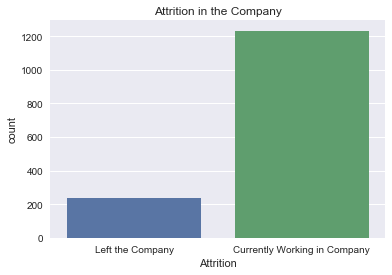

Currently Working in Company    1233
Left the Company                 237
Name: Attrition, dtype: int64

In [57]:
trgt = df2['Attrition'].apply(lambda x: 'Currently Working in Company' if x == 0 else 'Left the Company')
sns.countplot(trgt)
plt.title('Attrition in the Company')
plt.show()
trgt.value_counts()

In the company, there are 1470 employees and 237 employees, who compose of 16% of the total number of employee, left. Besides that, 1233 employee is currently working in the same company. 

### Features: 

**Age**

In [58]:
# Age & Attrition Table
age_att = df2.groupby('Age').agg({'Attrition':['size', 'sum', 'mean']})
age_att.columns = [' '.join(col).strip() for col in age_att.columns.values]
age_att = age_att.reset_index()
age_att['Attrition mean'] = age_att['Attrition mean']*100
age_att.columns = ['Age', 'Total Employee ', 'Attrition Number', '% Attrition of Relevant Age Group'] 
age_att

,Age,Total Employee,Attrition Number,% Attrition of Relevant Age Group
0,18,8,4,50.000000
1,19,9,6,66.666667
2,20,11,6,54.545455
3,21,13,6,46.153846
4,22,16,5,31.250000
5,23,14,4,28.571429
6,24,26,7,26.923077
7,25,26,6,23.076923
8,26,39,12,30.769231
9,27,48,3,6.250000


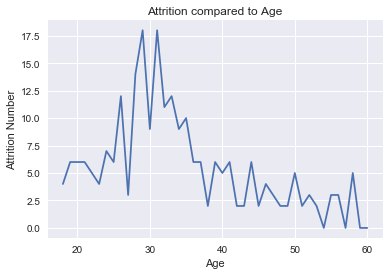

In [81]:
# Age & Attrition Line Graph
age_att['Attrition Number'].plot(kind = 'line')
plt.title('Attrition compared to Age')
plt.xlabel('Age')
plt.ylabel('Attrition Number')
plt.show()

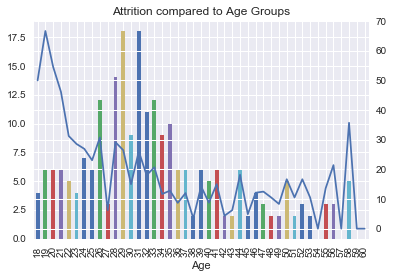

In [82]:
# Attrition compared to Age Groups Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
age_att.set_index(age_att['Age'], drop=True, inplace=True)
age_att['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
age_att['% Attrition of Relevant Age Group'].plot(use_index = False, kind = 'line', secondary_y = True, ax = ax2)
plt.title('Attrition compared to Age Groups')
plt.show()

In **18-21 age group**, young employees are more tend to leave the company. Their attrition proportion to their age group is approximately 54% (22 out of 41) and that makes up 9% of all attrition (22 out of 237). 

Besides, if we evaluate overall attrition number in the company,  **26-35 age group' attrition number** is high comparing to other age group. In this group, we have 19% of employee attrition(116 out 606). That makes up 49% of all attrition in the company (22 out of 237). 

**35-60 age group** generally prefers to stay in the company. I think that age group mostly wants to secure job position and doesn't want to relocate and reposition themselves. On the other hand, there are two age groups which come forward to deal with the attrition problem in the company: First of all, **the 26-35 age group**, which is with the huge attrition rate, and **18-21 age group**, which has high attrition proportion in its age group. This young groups are energetic and also always look for good opportunities to benefit. But this may not be the only reason for the high attrition. We should keep looking if anthing causes this consequence.

**Business Travel**

In [187]:
# Business Travel & Attrition Table
buss_trvl = df2.groupby('BusinessTravel').agg({'Attrition':['size', 'sum', 'mean']})
buss_trvl.columns = [' '.join(col).strip() for col in buss_trvl.columns.values]
buss_trvl = buss_trvl.reset_index()
buss_trvl['Attrition mean'] = buss_trvl['Attrition mean']*100
buss_trvl.columns = ['Travel Frequency', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Travel Group']
buss_trvl

,Travel Frequency,Total Employee,Attrition Number,% Attrition of Relevant Travel Group
0,Non-Travel,150,12,8.000000
1,Travel_Frequently,277,69,24.909747
2,Travel_Rarely,1043,156,14.956855


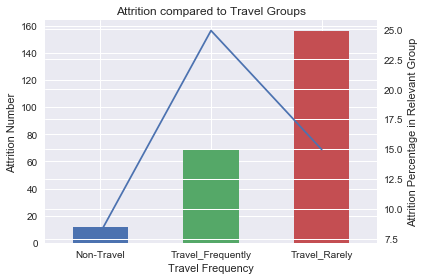

In [198]:
# Attrition compared to Travel Groups Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
buss_trvl.set_index(buss_trvl['Travel Frequency'], drop=True, inplace=True)
buss_trvl['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
buss_trvl['% Attrition of Relevant Travel Group'].plot(use_index = False, kind = 'line', ax = ax2)
plt.title('Attrition compared to Travel Groups')
ax1.set_xlabel("Travel Frequency")
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

In the company, most of the employee travel rarely or don't travel according to their job description. That group compose the 81.1% of entire company(1193). The rest of the company employee which is 19.9% of them has to travel frequently due to job obligation (277 out of 1470).  

The highest attrition number with 156 belongs to the **employees who travels rarely**. That is approximately 15% of employees in that group (156 out of 1043). But when you put this number overall attrition, it makes up 65.8% of all attrition in the company(156 out of 237).

if we look at the attrition percentage of relevant travel group, the **employees who are traveling frequently** are in the danger zone. Because they have the highest attrition proportion, which is 24.9%, in their individual travel group(69 out of 277). That group's attrition rate composes of the 29.1% of overall attrition in the company (69 out of 237).

**Employees who don't travel** in their current role have the lowest attrition rate, which is 8%.

Even though the higest attrition number is in the **travel rarely group**, the picture above tells us that **travel frequently employee group** is in more danger attrition zone in terms of travel group segment.

**Department**

In [86]:
# Department & Attrition Table
department = df2.groupby('Department').agg({'Attrition':['size', 'sum', 'mean']})
department.columns = [' '.join(col).strip() for col in department.columns.values]
department = department.reset_index()
department['Attrition mean'] = department['Attrition mean']*100
department.columns = ['Department', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Department']
department

,Department,Total Employee,Attrition Number,% Attrition of Relevant Department
0,Human Resources,63,12,19.047619
1,Research & Development,961,133,13.839750
2,Sales,446,92,20.627803


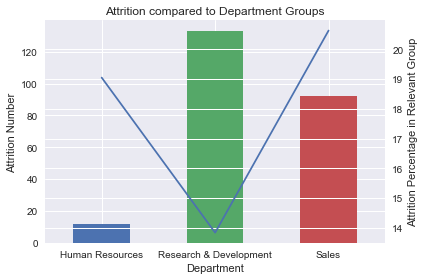

In [205]:
# Attrition compared to Department Groups Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
department.set_index(department['Department'], drop=True, inplace=True)
department['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot =0)
department['% Attrition of Relevant Department'].plot(use_index = False, kind = 'line', ax = ax2)
plt.title('Attrition compared to Department Groups')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

There are three departments in the company. **Research & Development Department** has the most attrition number in the company. 13.8% of **Research & Development Department** left the organization. In numbers, it is equal to 133, which makes us the 56.1% of all attrition in the company. Actually, that attrition is a big number for company, but compared with other departments, **Research & Development Department** has the lowest attrition rate in itself as an individual department. Thus, that attrition should not affect the department comparing to the other departments. 

**Sales Department** has mostly been affected by the attrition. Because 20.6% of its employees left the organization. This is the highest number compared to the other two departments. That attrition makes up 38.8% of the attrition in the company (92 out of 237). 

**Human Resources Department** follows the **Sales Department** in terms of being affected by attrition itself. 19% of this department employee left the company. But this is not that huge number in terms of whole attrition in company. **Human Resources Department** employee attrition makes up 5% of all attrition in the company (12 out of 237).

**Distance From Home**

In [88]:
# Distance From Home & Attrition Table
dist_home = df2.groupby('DistanceFromHome').agg({'Attrition':['size', 'sum', 'mean']})
dist_home.columns = [' '.join(col).strip() for col in dist_home.columns.values]
dist_home = dist_home.reset_index()
dist_home['Attrition mean'] = dist_home['Attrition mean']*100
dist_home.columns = ['Distance', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Distance']
dist_home

,Distance,Total Employee,Attrition Number,% Attrition of Relevant Distance
0,1,208,26,12.500000
1,2,211,28,13.270142
2,3,84,14,16.666667
3,4,64,9,14.062500
4,5,65,10,15.384615
5,6,59,7,11.864407
6,7,84,11,13.095238
7,8,80,10,12.500000
8,9,85,18,21.176471
9,10,86,11,12.790698


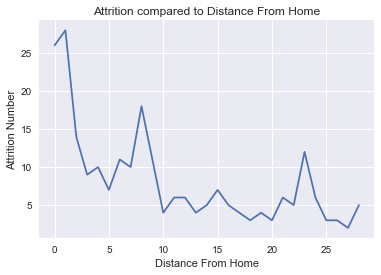

In [89]:
# Distance From Home & Attrition Line Graph
dist_home['Attrition Number'].plot(kind = 'line')
plt.title('Attrition compared to Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Attrition Number')
plt.show()

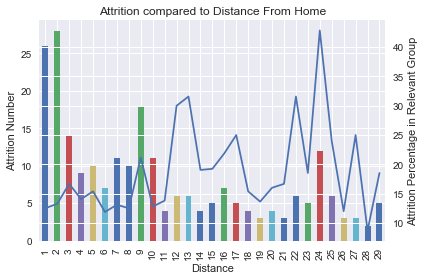

In [207]:
# Attrition compared to Distance From Home Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
dist_home.set_index(dist_home['Distance'], drop=True, inplace=True)
dist_home['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
dist_home['% Attrition of Relevant Distance'].plot(use_index = False, kind = 'line', ax = ax2)
plt.title('Attrition compared to Distance From Home')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Employees whose homes are 1-3 miles far away from the company** seem to leave the company more than others. This group's attrition rate is 28.6% of all company's attrition. But there are 502 employees in that distance and attrition rate in their group itself is just 11.5%. 

**Attrition rate seems to decrease as the distance from home increases.** There are some exceptions for that like in 9th miles and 24th miles. This might be outliers or there might be some other reasons for that. Even though this is the true, there is one more thing to bring to the table. With the increase in the distance from home, attrition rate is also getting higher in their individual distance. Namely, the proportion of attrition in the specific distance which is more away from home makes up around 15-40% of itself.

**Education**

In [122]:
# Education & Age Table
educat = df2.groupby('Education').agg({'Attrition':['size', 'sum', 'mean']})
educat.columns = [' '.join(col).strip() for col in educat.columns.values]
educat = educat.reset_index()
educat['Attrition mean'] = educat['Attrition mean']*100
educat.columns = ['Education Level', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Education Level']
educat['Education Level'] = educat['Education Level'].map({1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'})
educat

,Education Level,Total Employee,Attrition Number,% Attrition of Relevant Education Level
0,Below College,170,31,18.235294
1,College,282,44,15.602837
2,Bachelor,572,99,17.307692
3,Master,398,58,14.572864
4,Doctor,48,5,10.416667


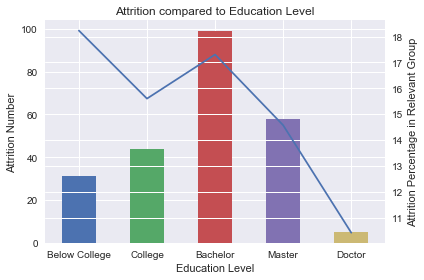

In [208]:
# Attrition compared to Education Level Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
educat['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
educat['% Attrition of Relevant Education Level'].plot(use_index = False, kind = 'line', ax = ax2)
plt.title('Attrition compared to Education Level')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Employees who have bachelor degree** have the most attrition number (99 employees) in the company. That makes up 41.8% of all attrition in the company. **Employees who have Ph.D. degree** composes the least attrition number in the company.

**Employees who have the master, college, and below college degrees** are follower of **employees who have bachelor degrees** in terms of the attrition number in the company respectively.

**Education Field**

In [129]:
# Education Field & Attrition Table
ed_field = df2.groupby('EducationField').agg({'Attrition':['size', 'sum', 'mean']})
ed_field.columns = [' '.join(col).strip() for col in ed_field.columns.values]
ed_field = ed_field.reset_index()
ed_field['Attrition mean'] = ed_field['Attrition mean']*100
ed_field.columns = ['Education Field', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Education Field']
ed_field

,Education Field,Total Employee,Attrition Number,% Attrition of Relevant Education Field
0,Human Resources,27,7,25.925926
1,Life Sciences,606,89,14.686469
2,Marketing,159,35,22.012579
3,Medical,464,63,13.577586
4,Other,82,11,13.414634
5,Technical Degree,132,32,24.242424


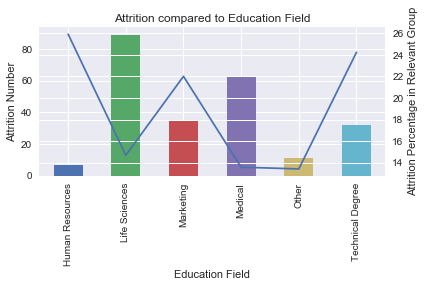

In [210]:
# Attrition compared to Education Field
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
ed_field.set_index(ed_field['Education Field'], drop=True, inplace=True)
ed_field['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
ed_field['% Attrition of Relevant Education Field'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Education Field')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Employees who have Life Science** education level (89 employees) have the most attrition. it makes up the 37.5% of all attrition (89 out of 237). But that composes only 14.7% of attrition within its education field. 

**Human Resources, Technical Degree, and Marketing** fields are mostly affected by the attrition respectively. Their approximately 22-26% employees leaves the company. 

**Environment Satisfaction**

In [136]:
# Environment & Attrition Table
satisfact = df2.groupby('EnvironmentSatisfaction').agg({'Attrition':['size', 'sum', 'mean']})
satisfact.columns = [' '.join(col).strip() for col in satisfact.columns.values]
satisfact = satisfact.reset_index()
satisfact['Attrition mean'] = satisfact['Attrition mean']*100
satisfact.columns = ['Environment Satisfaction', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Environment Satisfaction']
satisfact['Environment Satisfaction'] = satisfact['Environment Satisfaction'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
satisfact

,Environment Satisfaction,Total Employee,Attrition Number,% Attrition of Relevant Environment Satisfaction
0,Low,284,72,25.352113
1,Medium,287,43,14.982578
2,High,453,62,13.686534
3,Very High,446,60,13.452915


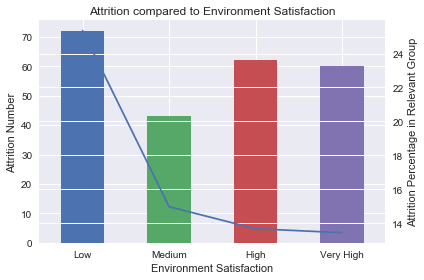

In [211]:
# Attrition compared to Environment Satisfaction Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
satisfact.set_index(satisfact['Environment Satisfaction'], drop=True, inplace=True)
satisfact['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
satisfact['% Attrition of Relevant Environment Satisfaction'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Environment Satisfaction')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

As it may be expected, there is a high attrition rate in the **low satisfaction environment**. That composes the 30% of the whole company's attrition.

Shockingly, in the **high and  very high satisfaction environment**, there are still 13.6% of the these both group's employees leave the company. That attrition composes of the 51.5% of the whole company's attrition. 

**Gender**

In [142]:
# Gender & Attrition Table
gender = df2.groupby('Gender').agg({'Attrition':['size', 'sum', 'mean']})
gender.columns = [' '.join(col).strip() for col in gender.columns.values]
gender = gender.reset_index()
gender['Attrition mean'] = gender['Attrition mean']*100
gender.columns = ['Gender', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Gender']
gender

,Gender,Total Employee,Attrition Number,% Attrition of Relevant Gender
0,Female,588,87,14.795918
1,Male,882,150,17.006803


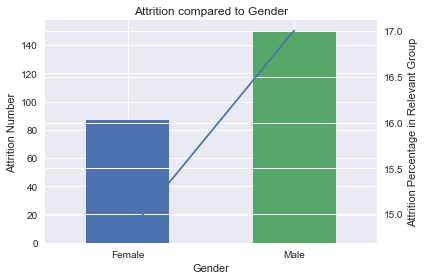

In [212]:
# Attrition compared to Gender Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
gender.set_index(gender['Gender'], drop=True, inplace=True)
gender['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
gender['% Attrition of Relevant Gender'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Gender')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Male employees** are more tend to leave the company than **female employees**. Even the male employees' number are more than female employees's number, there is a something that should be considered in the further process. 

**Job Involvement**

In [150]:
# Job Involvement & Attrition Table
job_invol = df2.groupby('JobInvolvement').agg({'Attrition':['size', 'sum', 'mean']})
job_invol.columns = [' '.join(col).strip() for col in job_invol.columns.values]
job_invol = job_invol.reset_index()
job_invol['Attrition mean'] = job_invol['Attrition mean']*100
job_invol.columns = ['Job Involvement', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Job Involvement']
job_invol['Job Involvement'] = job_invol['Job Involvement'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
job_invol

,Job Involvement,Total Employee,Attrition Number,% Attrition of Relevant Job Involvement
0,Low,83,28,33.734940
1,Medium,375,71,18.933333
2,High,868,125,14.400922
3,Very High,144,13,9.027778


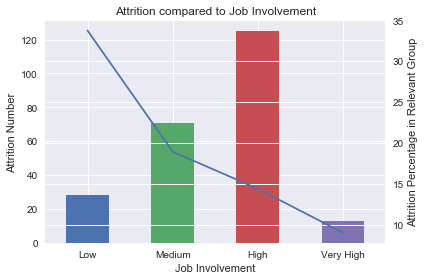

In [213]:
# Attrition compared to Job Involvement Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
job_invol.set_index(job_invol['Job Involvement'], drop=True, inplace=True)
job_invol['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
job_invol['% Attrition of Relevant Job Involvement'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Job Involvement')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Job Level**

In [154]:
# Job Level & Attrition Table
job_level = df2.groupby('JobLevel').agg({'Attrition':['size', 'sum', 'mean']})
job_level.columns = [' '.join(col).strip() for col in job_level.columns.values]
job_level = job_level.reset_index()
job_level['Attrition mean'] = job_level['Attrition mean']*100
job_level.columns = ['Job Level', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Job Level']
job_level['Job Level'] = job_level['Job Level'].map({1:'Level-1', 2:'Level-2', 3:'Level-3', 4:'Level-4', 5:'Level-5'})
job_level

,Job Level,Total Employee,Attrition Number,% Attrition of Relevant Job Level
0,Level-1,543,143,26.335175
1,Level-2,534,52,9.737828
2,Level-3,218,32,14.678899
3,Level-4,106,5,4.716981
4,Level-5,69,5,7.246377


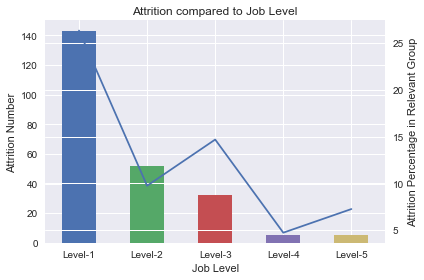

In [214]:
# Attrition compared to Job Level Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
job_level.set_index(job_level['Job Level'], drop=True, inplace=True)
job_level['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
job_level['% Attrition of Relevant Job Level'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Job Level')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Job Role**

In [156]:
# Job Role & Attrition Table
job_role = df2.groupby('JobRole').agg({'Attrition':['size', 'sum', 'mean']})
job_role.columns = [' '.join(col).strip() for col in job_role.columns.values]
job_role = job_role.reset_index()
job_role['Attrition mean'] = job_role['Attrition mean']*100
job_role.columns = ['Job Role', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Job Role']
job_role

,Job Role,Total Employee,Attrition Number,% Attrition of Relevant Job Role
0,Healthcare Representative,131,9,6.870229
1,Human Resources,52,12,23.076923
2,Laboratory Technician,259,62,23.938224
3,Manager,102,5,4.901961
4,Manufacturing Director,145,10,6.896552
5,Research Director,80,2,2.500000
6,Research Scientist,292,47,16.095890
7,Sales Executive,326,57,17.484663
8,Sales Representative,83,33,39.759036


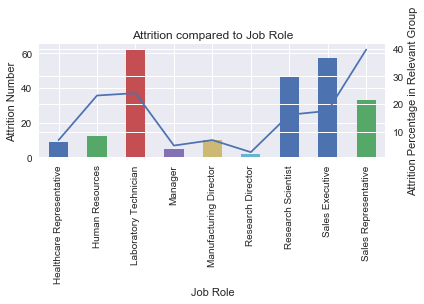

In [219]:
# Attrition compared to Job Role Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
job_role.set_index(job_role['Job Role'], drop=True, inplace=True)
job_role['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
job_role['% Attrition of Relevant Job Role'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Job Role')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tightax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()_layout()
plt.show()

**Job Satisfaction**

In [158]:
# Job Satisfaction & Attrition Table
job_satisf = df2.groupby('JobSatisfaction').agg({'Attrition':['size', 'sum', 'mean']})
job_satisf.columns = [' '.join(col).strip() for col in job_satisf.columns.values]
job_satisf = job_satisf.reset_index()
job_satisf['Attrition mean'] = job_satisf['Attrition mean']*100
job_satisf.columns = ['Job Satisfaction', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Job Satisfaction']
job_satisf['Job Satisfaction'] = job_satisf['Job Satisfaction'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
job_satisf

,Job Satisfaction,Total Employee,Attrition Number,% Attrition of Relevant Job Satisfaction
0,Low,289,66,22.837370
1,Medium,280,46,16.428571
2,High,442,73,16.515837
3,Very High,459,52,11.328976


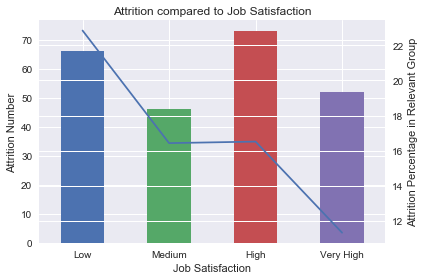

In [220]:
# Attrition compared to Job Satisfaction
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
job_satisf.set_index(job_satisf['Job Satisfaction'], drop=True, inplace=True)
job_satisf['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
job_satisf['% Attrition of Relevant Job Satisfaction'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Job Satisfaction')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Marital Status**

In [160]:
# Marital Status & Attrition Table
marital_status = df2.groupby('MaritalStatus').agg({'Attrition':['size', 'sum', 'mean']})
marital_status.columns = [' '.join(col).strip() for col in marital_status.columns.values]
marital_status = marital_status.reset_index()
marital_status['Attrition mean'] = marital_status['Attrition mean']*100
marital_status.columns = ['Marital Status', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Marital Status']
marital_status

,Marital Status,Total Employee,Attrition Number,% Attrition of Relevant Marital Status
0,Divorced,327,33,10.091743
1,Married,673,84,12.481426
2,Single,470,120,25.531915


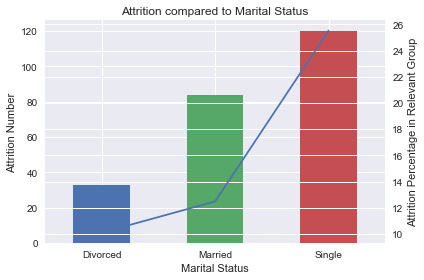

In [221]:
# Attrition compared to Marital Status Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
marital_status.set_index(marital_status['Marital Status'], drop=True, inplace=True)
marital_status['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
marital_status['% Attrition of Relevant Marital Status'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Marital Status')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Monthly Income**

Text(0.5,1,'Attrition compared to Monthly Income')

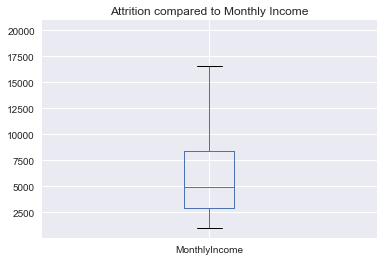

In [164]:
df2['MonthlyIncome'].plot(kind = 'box')
plt.title('Attrition compared to Monthly Income')

**Monthly Rate**

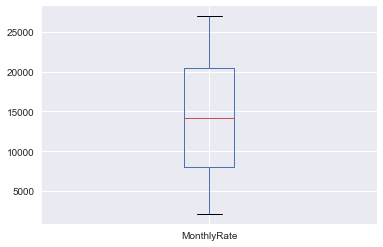

In [167]:
df2['MonthlyRate'].plot(kind='box')

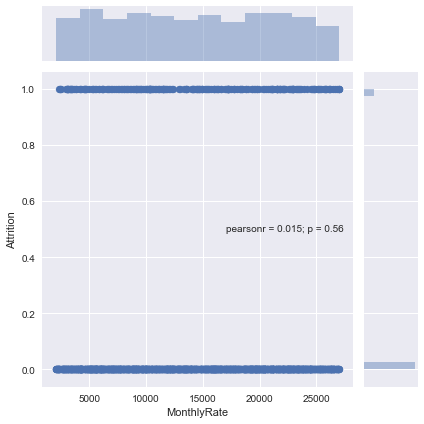

In [292]:
sns.jointplot(df2['MonthlyRate'], df2['Attrition'], kind= 'scatter')
plt.show()

**Numbers Companies Worked**

In [168]:
# Numbers Companied Worked & Attrition Table
comp_worked = df2.groupby('NumCompaniesWorked').agg({'Attrition':['size', 'sum', 'mean']})
comp_worked.columns = [' '.join(col).strip() for col in comp_worked.columns.values]
comp_worked = comp_worked.reset_index()
comp_worked['Attrition mean'] = comp_worked['Attrition mean']*100
comp_worked.columns = ['Numbers of Companies Worked', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Num Companies Worked']
comp_worked

,Numbers of Companies Worked,Total Employee,Attrition Number,% Attrition of Relevant Num Companies Worked
0,0,197,23,11.675127
1,1,521,98,18.809981
2,2,146,16,10.958904
3,3,159,16,10.062893
4,4,139,17,12.230216
5,5,63,16,25.396825
6,6,70,16,22.857143
7,7,74,17,22.972973
8,8,49,6,12.244898
9,9,52,12,23.076923


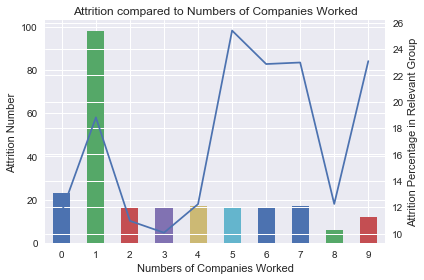

In [222]:
# Attrition compared to Numbers of Companies Worked Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
comp_worked.set_index(comp_worked['Numbers of Companies Worked'], drop=True, inplace=True)
comp_worked['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
comp_worked['% Attrition of Relevant Num Companies Worked'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Numbers of Companies Worked')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Over Time**

In [172]:
# Over Time & Attrition Table
over_time = df2.groupby('OverTime').agg({'Attrition':['size', 'sum', 'mean']})
over_time.columns = [' '.join(col).strip() for col in over_time.columns.values]
over_time = over_time.reset_index()
over_time['Attrition mean'] = over_time['Attrition mean']*100
over_time.columns = ['Over Time', 'Total Employee', 'Attrition Number', '% Attrition of Relevant Over Time']
over_time

,Over Time,Total Employee,Attrition Number,% Attrition of Relevant Over Time
0,No,1054,110,10.436433
1,Yes,416,127,30.528846


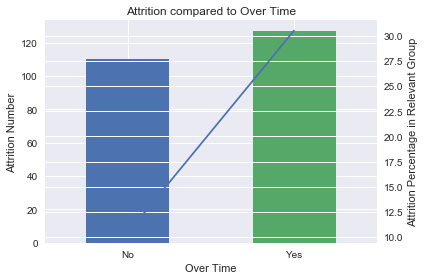

In [223]:
# Attrition compared to Over Time Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
over_time.set_index(over_time['Over Time'], drop=True, inplace=True)
over_time['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
over_time['% Attrition of Relevant Over Time'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Over Time')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Percent Salary Hike**

In [224]:
# Percent Salary Hike & Attrition Table
perc_shike = df2.groupby('PercentSalaryHike').agg({'Attrition':['size', 'sum', 'mean']})
perc_shike.columns = [' '.join(col).strip() for col in perc_shike.columns.values]
perc_shike = perc_shike.reset_index()
perc_shike['Attrition mean'] = perc_shike['Attrition mean']*100
perc_shike.columns = ['Percent Salary Hike', 'Total Employee', 'Attrition Number', 
                      '% Attrition of Relevant Percent Salary Hike']
perc_shike

,Percent Salary Hike,Total Employee,Attrition Number,% Attrition of Relevant Percent Salary Hike
0,11,210,41,19.523810
1,12,198,33,16.666667
2,13,209,34,16.267943
3,14,201,24,11.940299
4,15,101,18,17.821782
5,16,78,14,17.948718
6,17,82,14,17.073171
7,18,89,13,14.606742
8,19,76,9,11.842105
9,20,55,7,12.727273


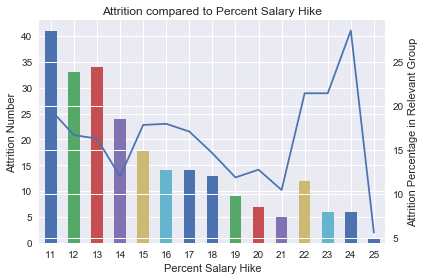

In [228]:
# Attrition compared to Percent Salary Hike
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
perc_shike.set_index(perc_shike['Percent Salary Hike'], drop=True, inplace=True)
perc_shike['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
perc_shike['% Attrition of Relevant Percent Salary Hike'].plot(use_index = False, kind = 'line', ax = ax2)
plt.title('Attrition compared to Percent Salary Hike')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Performance Rating**

In [229]:
# Performance Rating & Attrition Table
per_rate = df2.groupby('PerformanceRating').agg({'Attrition':['size', 'sum', 'mean']})
per_rate.columns = [' '.join(col).strip() for col in per_rate.columns.values]
per_rate = per_rate.reset_index()
per_rate['Attrition mean'] = per_rate['Attrition mean']*100
per_rate.columns = ['Performance Rating', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Performance Rating']
per_rate

,Performance Rating,Total Employee,Attrition Number,% Attrition of Relevant Performance Rating
0,3,1244,200,16.077170
1,4,226,37,16.371681


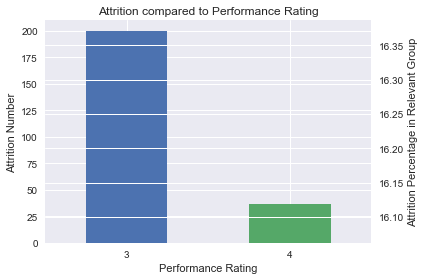

In [230]:
# Attrition compared to Performance Rating
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
per_rate.set_index(per_rate['Performance Rating'], drop=True, inplace=True)
per_rate['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
per_rate['% Attrition of Relevant Performance Rating'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Performance Rating')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Relationship Satisfaction**

In [232]:
# Relationship & Attrition Table
rltn_satisf = df2.groupby('RelationshipSatisfaction').agg({'Attrition':['size', 'sum', 'mean']})
rltn_satisf.columns = [' '.join(col).strip() for col in rltn_satisf.columns.values]
rltn_satisf = rltn_satisf.reset_index()
rltn_satisf['Attrition mean'] = rltn_satisf['Attrition mean']*100
rltn_satisf.columns = ['Relationship Satisfaction', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Relationship Satisfaction']
rltn_satisf['Relationship Satisfaction'] = rltn_satisf['Relationship Satisfaction'].map({1:'Low', 2:'Medium', 3:'High', 4:'Very High'})
rltn_satisf

,Relationship Satisfaction,Total Employee,Attrition Number,% Attrition of Relevant Relationship Satisfaction
0,Low,276,57,20.652174
1,Medium,303,45,14.851485
2,High,459,71,15.468410
3,Very High,432,64,14.814815


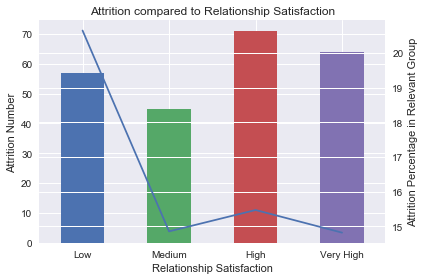

In [233]:
# Attrition compared to Relationship Satisfaction Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
rltn_satisf.set_index(rltn_satisf['Relationship Satisfaction'], drop=True, inplace=True)
rltn_satisf['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
rltn_satisf['% Attrition of Relevant Relationship Satisfaction'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Relationship Satisfaction')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**StockOptionLevel**

In [234]:
# Stock Option Level & Attrition Table
stck_level = df2.groupby('StockOptionLevel').agg({'Attrition':['size', 'sum', 'mean']})
stck_level.columns = [' '.join(col).strip() for col in stck_level.columns.values]
stck_level = stck_level.reset_index()
stck_level['Attrition mean'] = stck_level['Attrition mean']*100
stck_level.columns = ['Stock Option Level', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Stock Option Level']
stck_level

,Stock Option Level,Total Employee,Attrition Number,% Attrition of Relevant Stock Option Level
0,0,631,154,24.405705
1,1,596,56,9.395973
2,2,158,12,7.594937
3,3,85,15,17.647059


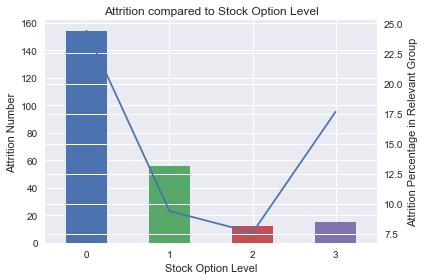

In [235]:
# Attrition compared to Stock Option Level Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
stck_level.set_index(stck_level['Stock Option Level'], drop=True, inplace=True)
stck_level['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
stck_level['% Attrition of Relevant Stock Option Level'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Stock Option Level')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Total Working Years**

In [236]:
# Total Working Years & Attrition Table
work_year = df2.groupby('TotalWorkingYears').agg({'Attrition':['size', 'sum', 'mean']})
work_year.columns = [' '.join(col).strip() for col in work_year.columns.values]
work_year = work_year.reset_index()
work_year['Attrition mean'] = work_year['Attrition mean']*100
work_year.columns = ['Total Working Years', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Total Working Years']
work_year

,Total Working Years,Total Employee,Attrition Number,% Attrition of Relevant Total Working Years
0,0,11,5,45.454545
1,1,81,40,49.382716
2,2,31,9,29.032258
3,3,42,9,21.428571
4,4,63,12,19.047619
5,5,88,16,18.181818
6,6,125,22,17.600000
7,7,81,18,22.222222
8,8,103,16,15.533981
9,9,96,10,10.416667


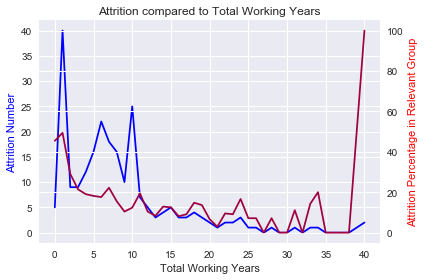

In [267]:
# Attrition compared to Total Working Years Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
work_year.set_index(work_year['Total Working Years'], drop=True, inplace=True)
work_year['Attrition Number'].plot(kind = 'line', stacked = True, ax = ax1, colormap = 'winter')
work_year['% Attrition of Relevant Total Working Years'].plot(kind = 'line', ax = ax2, colormap='Spectral')
plt.title('Attrition compared to Total Working Years')
ax1.set_ylabel("Attrition Number", )
ax1.yaxis.label.set_color('blue')
ax2.set_ylabel("Attrition Percentage in Relevant Group")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

**Training Times Last Year**

In [284]:
# Training Times Last Year & Attrition Table
train_lstyr = df2.groupby('TrainingTimesLastYear').agg({'Attrition':['size', 'sum', 'mean']})
train_lstyr.columns = [' '.join(col).strip() for col in train_lstyr.columns.values]
train_lstyr = train_lstyr.reset_index()
train_lstyr['Attrition mean'] = train_lstyr['Attrition mean']*100
train_lstyr.columns = ['Training_Times', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Training_Times']
train_lstyr

,Training_Times,Total Employee,Attrition Number,% Attrition of Relevant Training_Times
0,0,54,15,27.777778
1,1,71,9,12.676056
2,2,547,98,17.915905
3,3,491,69,14.052953
4,4,123,26,21.138211
5,5,119,14,11.764706
6,6,65,6,9.230769


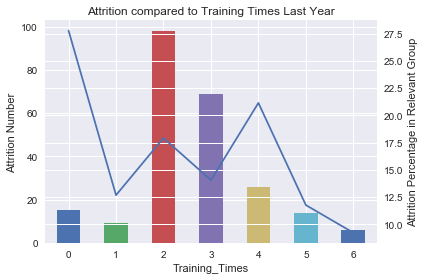

In [285]:
# Attrition compared to Training Times Last Year Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
train_lstyr.set_index(train_lstyr['Training_Times'], drop=True, inplace=True)
train_lstyr['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
train_lstyr['% Attrition of Relevant Training_Times'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Training Times Last Year')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Work Life Balance**

In [287]:
# Work Life Balance & Attrition Table
wrk_life = df2.groupby('WorkLifeBalance').agg({'Attrition':['size', 'sum', 'mean']})
wrk_life.columns = [' '.join(col).strip() for col in wrk_life.columns.values]
wrk_life = wrk_life.reset_index()
wrk_life['Attrition mean'] = wrk_life['Attrition mean']*100
wrk_life.columns = ['Work Life Balance', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Work Life Balance Group']
wrk_life['Work Life Balance'] = wrk_life['Work Life Balance'].map({1:'Bad', 2:'Good', 3:'Better', 4:'Best'})
wrk_life

,Work Life Balance,Total Employee,Attrition Number,% Attrition of Relevant Work Life Balance Group
0,Bad,80,25,31.250000
1,Good,344,58,16.860465
2,Better,893,127,14.221725
3,Best,153,27,17.647059


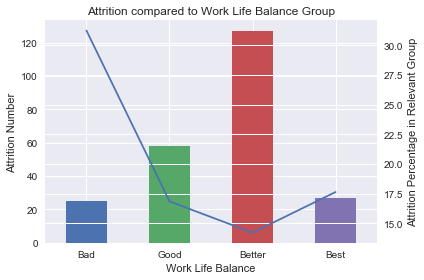

In [289]:
# Attrition compared to Work Life Balance Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
wrk_life.set_index(wrk_life['Work Life Balance'], drop=True, inplace=True)
wrk_life['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1, rot=0)
wrk_life['% Attrition of Relevant Work Life Balance Group'].plot(kind = 'line', ax = ax2)
plt.title('Attrition compared to Work Life Balance Group')
ax1.set_ylabel("Attrition Number")
ax2.set_ylabel("Attrition Percentage in Relevant Group")
plt.tight_layout()
plt.show()

**Years at Company**

In [290]:
# Years at Company & Attrition Table
yr_at_comp = df2.groupby('YearsAtCompany').agg({'Attrition':['size', 'sum', 'mean']})
yr_at_comp.columns = [' '.join(col).strip() for col in yr_at_comp.columns.values]
yr_at_comp = yr_at_comp.reset_index()
yr_at_comp['Attrition mean'] = yr_at_comp['Attrition mean']*100
yr_at_comp.columns = ['Years at Company', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Years at Company']
yr_at_comp

,Years at Company,Total Employee,Attrition Number,% Attrition of Relevant Years at Company
0,0,44,16,36.363636
1,1,171,59,34.502924
2,2,127,27,21.259843
3,3,128,20,15.625000
4,4,110,19,17.272727
5,5,196,21,10.714286
6,6,76,9,11.842105
7,7,90,11,12.222222
8,8,80,9,11.250000
9,9,82,8,9.756098


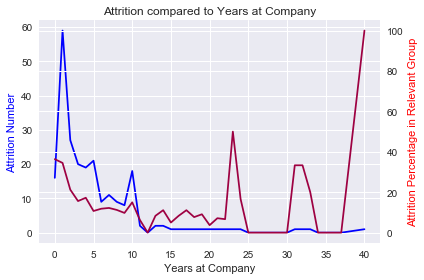

In [291]:
# Attrition compared to Work Life Balance Graph
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()
yr_at_comp.set_index(yr_at_comp['Years at Company'], drop=True, inplace=True)
yr_at_comp['Attrition Number'].plot(kind = 'line', stacked = True, ax = ax1, colormap = 'winter')
yr_at_comp['% Attrition of Relevant Years at Company'].plot(kind = 'line', ax = ax2, colormap='Spectral')
plt.title('Attrition compared to Years at Company')
ax1.set_ylabel("Attrition Number")
ax1.yaxis.label.set_color('blue')
ax2.set_ylabel("Attrition Percentage in Relevant Group")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

**Years in Current Role**

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [ ]:
per_rate = df2.groupby('PerformanceRating').agg({'Attrition':['size', 'sum', 'mean']})
per_rate.columns = [' '.join(col).strip() for col in per_rate.columns.values]
per_rate = per_rate.reset_index()
per_rate['Attrition mean'] = per_rate['Attrition mean']*100
per_rate.columns = ['Performance Rating', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Performance Rating']
per_rate

In [ ]:
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()

per_rate['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
per_rate['% Attrition of Relevant Performance Rating'].plot(kind = 'line', secondary_y = True, ax = ax2)
per_rate.label = list(["Low", "Good", "Excellent", "Outstanding"]) #problem 
plt.title('Attrition compared to Performance Rating')
plt.xlabel('Performance Rating') #  problem
plt.show()

**Years Since Last Promotion**

In [ ]:
per_rate = df2.groupby('PerformanceRating').agg({'Attrition':['size', 'sum', 'mean']})
per_rate.columns = [' '.join(col).strip() for col in per_rate.columns.values]
per_rate = per_rate.reset_index()
per_rate['Attrition mean'] = per_rate['Attrition mean']*100
per_rate.columns = ['Performance Rating', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Performance Rating']
per_rate

In [ ]:
per_rate = df2.groupby('PerformanceRating').agg({'Attrition':['size', 'sum', 'mean']})
per_rate.columns = [' '.join(col).strip() for col in per_rate.columns.values]
per_rate = per_rate.reset_index()
per_rate['Attrition mean'] = per_rate['Attrition mean']*100
per_rate.columns = ['Performance Rating', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Performance Rating']
per_rate

**Years with Current Manager**

In [ ]:
per_rate = df2.groupby('PerformanceRating').agg({'Attrition':['size', 'sum', 'mean']})
per_rate.columns = [' '.join(col).strip() for col in per_rate.columns.values]
per_rate = per_rate.reset_index()
per_rate['Attrition mean'] = per_rate['Attrition mean']*100
per_rate.columns = ['Performance Rating', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Performance Rating']
per_rate

In [ ]:
per_rate = df2.groupby('PerformanceRating').agg({'Attrition':['size', 'sum', 'mean']})
per_rate.columns = [' '.join(col).strip() for col in per_rate.columns.values]
per_rate = per_rate.reset_index()
per_rate['Attrition mean'] = per_rate['Attrition mean']*100
per_rate.columns = ['Performance Rating', 'Total Employee', 'Attrition Number', 
                    '% Attrition of Relevant Performance Rating']
per_rate

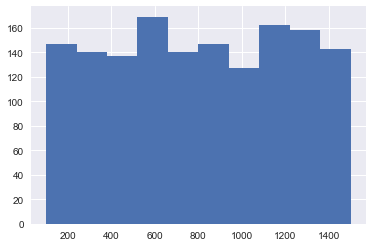

In [117]:
df2['DailyRate'].hist()

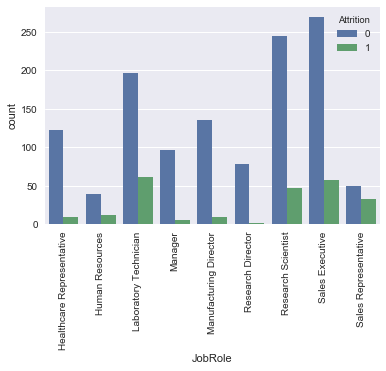

In [121]:
sns.countplot(x = df2["JobRole"], hue= "Attrition", data=df2)
plt.xticks(rotation=90)
plt.show()

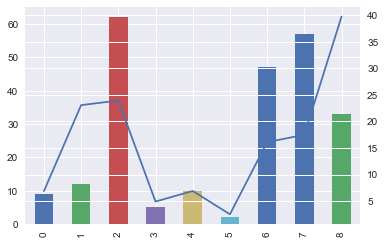

In [162]:
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()

res['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
res['% Attrition of Relevant Job Role'].plot(kind = 'line', secondary_y = True, ax = ax2)
res.label = list(["Healthcare Representative", "Human Resources", "Laboratory Technician",
               "Manager","Manufacturing Director","Research Director", "Research Scientist",
               "Sales Executive", "Sales Representative"])
plt.show()

In [113]:
res = df2.groupby('JobRole').agg({'Attrition':['size', 'sum', 'mean']})
res.columns = [' '.join(col).strip() for col in res.columns.values]
res = res.reset_index()
res['Attrition mean'] = res['Attrition mean']*100
res.columns = ['Job Role', 'Total Personal', 'Attrition Number', '% Attrition of Relevant Job Role']
res

,Job Role,Total Personal,Attrition Number,% Attrition of Relevant Job Role
0,Healthcare Representative,131,9,6.870229
1,Human Resources,52,12,23.076923
2,Laboratory Technician,259,62,23.938224
3,Manager,102,5,4.901961
4,Manufacturing Director,145,10,6.896552
5,Research Director,80,2,2.500000
6,Research Scientist,292,47,16.095890
7,Sales Executive,326,57,17.484663
8,Sales Representative,83,33,39.759036


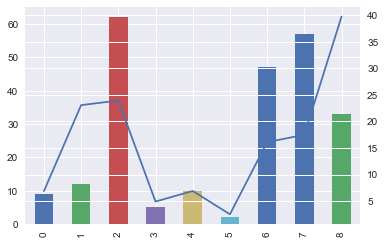

In [114]:
fig0, ax1 = plt.subplots()
ax2 = ax1.twinx()

res['Attrition Number'].plot(kind = 'bar', stacked = True, ax = ax1)
res['% Attrition of Relevant Job Role'].plot(kind = 'line', secondary_y = True, ax = ax2)
res.label = list(["Healthcare Representative", "Human Resources", "Laboratory Technician",
               "Manager","Manufacturing Director","Research Director", "Research Scientist",
               "Sales Executive", "Sales Representative"])
plt.show()

,Job Role,Total Personal,Attrition Number,% Attrition of Relevant Job Role
Healthcare Representative,Healthcare Representative,131,9,6.870229
Human Resources,Human Resources,52,12,23.076923
Laboratory Technician,Laboratory Technician,259,62,23.938224
Manager,Manager,102,5,4.901961
Manufacturing Director,Manufacturing Director,145,10,6.896552
Research Director,Research Director,80,2,2.500000
Research Scientist,Research Scientist,292,47,16.095890
Sales Executive,Sales Executive,326,57,17.484663
Sales Representative,Sales Representative,83,33,39.759036


In [119]:
df2.groupby('JobRole')['Attrition'].value_counts() 

JobRole                    Attrition
Healthcare Representative  0            122
                           1              9
Human Resources            0             40
                           1             12
Laboratory Technician      0            197
                           1             62
Manager                    0             97
                           1              5
Manufacturing Director     0            135
                           1             10
Research Director          0             78
                           1              2
Research Scientist         0            245
                           1             47
Sales Executive            0            269
                           1             57
Sales Representative       0             50
                           1             33
Name: Attrition, dtype: int64

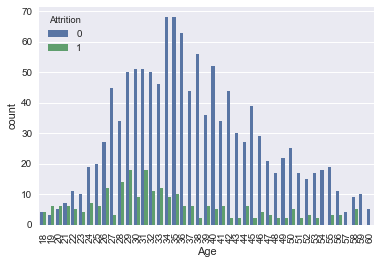

In [122]:
sns.countplot(x = df2["Age"], hue= "Attrition", data=df2)
plt.xticks(rotation=90)
plt.show()

In [123]:
df2.groupby('Age')['Attrition'].value_counts() 

Age  Attrition
18   0             4
     1             4
19   1             6
     0             3
20   1             6
     0             5
21   0             7
     1             6
22   0            11
     1             5
23   0            10
     1             4
24   0            19
     1             7
25   0            20
     1             6
26   0            27
     1            12
27   0            45
     1             3
28   0            34
     1            14
29   0            50
     1            18
30   0            51
     1             9
31   0            51
     1            18
32   0            50
     1            11
                  ..
44   0            27
     1             6
45   0            39
     1             2
46   0            29
     1             4
47   0            21
     1             3
48   0            17
     1             2
49   0            22
     1             2
50   0            25
     1             5
51   0            17
     1             

In [129]:
df2['Age'].loc[df2['Age'].isin(['18', '25'])].value_counts()

25    26
18     8
Name: Age, dtype: int64

### Categorical Variable Counts:

I will look at the cateogorical variables and see their counts in addition to how the employee counts are distributed.

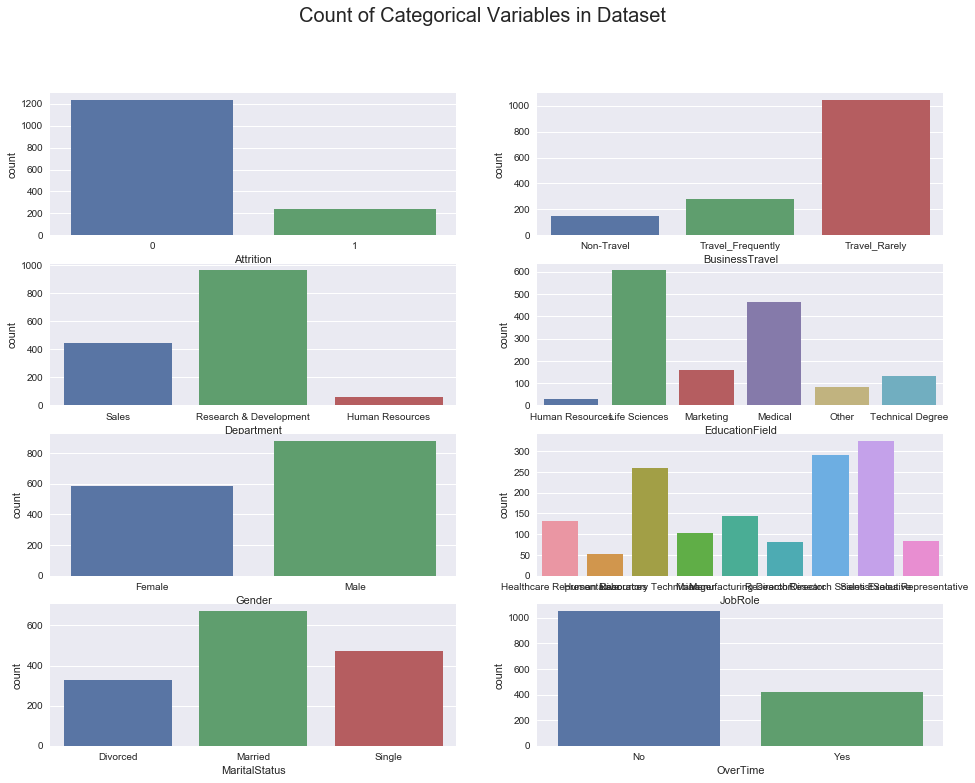

In [124]:
fig, ax = plt.subplots(4, 2, figsize=(16,12))
plt.suptitle('Count of Categorical Variables in Dataset', fontsize=20)

sns.countplot(df2["Attrition"], ax = ax[0,0])
sns.countplot(df2["BusinessTravel"], ax = ax[0,1])
sns.countplot(df["Department"], ax = ax[1,0])
sns.countplot(df2["EducationField"], ax = ax[1,1])
sns.countplot(df2["Gender"], ax = ax[2,0])
sns.countplot(df2["JobRole"], ax = ax[2,1])
sns.countplot(df2["MaritalStatus"], ax = ax[3,0])
sns.countplot(df2["OverTime"], ax = ax[3,1]) 

- put comment here

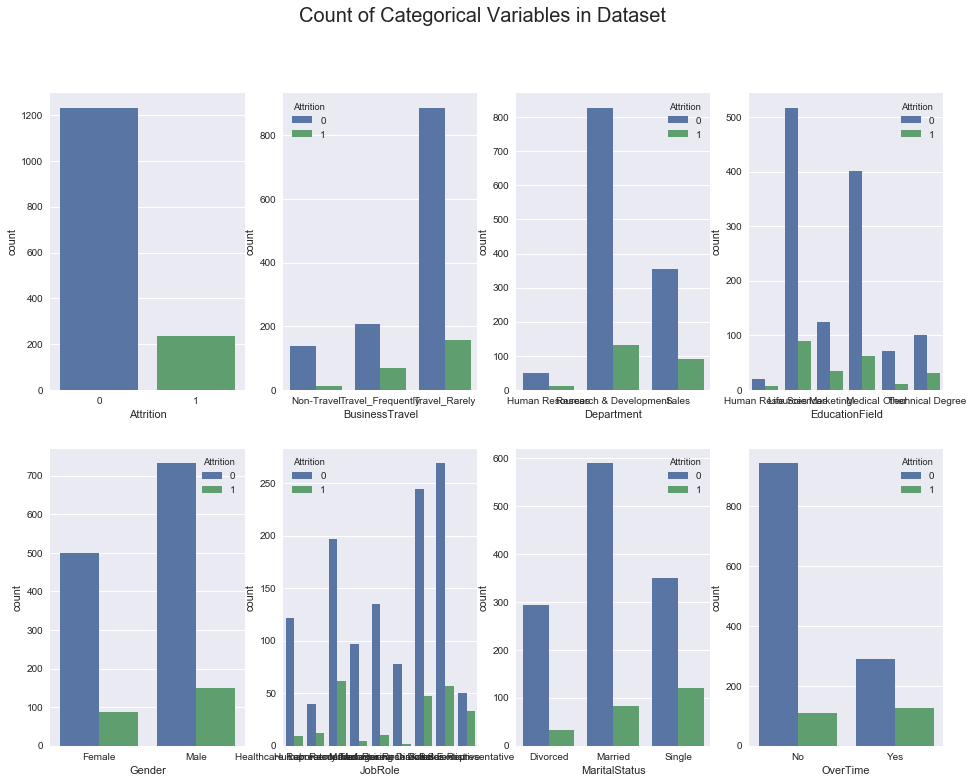

In [125]:
fig, ax = plt.subplots(2, 4, figsize=(16,12))
plt.suptitle('Count of Categorical Variables in Dataset', fontsize=20)

sns.countplot(x="Attrition", data=df2, ax = ax[0,0])
sns.countplot(x="BusinessTravel", hue= "Attrition", data=df2, ax = ax[0,1])
sns.countplot(x="Department", hue= "Attrition", data=df2, ax = ax[0,2])
sns.countplot(x="EducationField", hue= "Attrition", data=df2, ax = ax[0,3])
sns.countplot(x="Gender", hue= "Attrition", data=df2, ax = ax[1,0])
sns.countplot(x="JobRole", hue= "Attrition", data=df2, ax = ax[1,1])
sns.countplot(x="MaritalStatus", hue= "Attrition", data=df2, ax = ax[1,2])
sns.countplot(df2["OverTime"], hue= "Attrition", data=df2, ax = ax[1,3])

Here, we see that none of the other categorical variables shown here is as imbalanced as Attrition, although business travel comes close.

Also, looking at department, education field, and jobrole, we can also see these employees look to represent some type of business in the medial research industry.

Of course, one of the most important ones for this notebook is Attrition, so let us take a look at that one with a larger plot for easier interpretation.

### Numeric Variable Distributions:

With that data a bit more clean now, we shall look at the distribution of the numeric features in the dataset. It should be noted that some of the variables are read in as integers (numeric), but represent a discrete amount of values. These variables (and the integer meanings if known) are presented below:

Education - 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
EnvironmentSatisfaction - 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
JobInvolvement - 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
JobSatisfaction - 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
PerformanceRating - 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
RelationshipSatisfaction - 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
WorkLifeBalance - 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
JobLevel
StockOptionLevel
For now, we will treat these as numeric variables. Although these variables have an order to them, their meanings as integers may be flawed.. For example, having a 'Bachelor Degree' (3) does not necessarily mean it is 3 times 'greater' than having 'Below Education' (1) education; however, these features are ordinal (i.e. the categories have an order to them of one being greater than another).

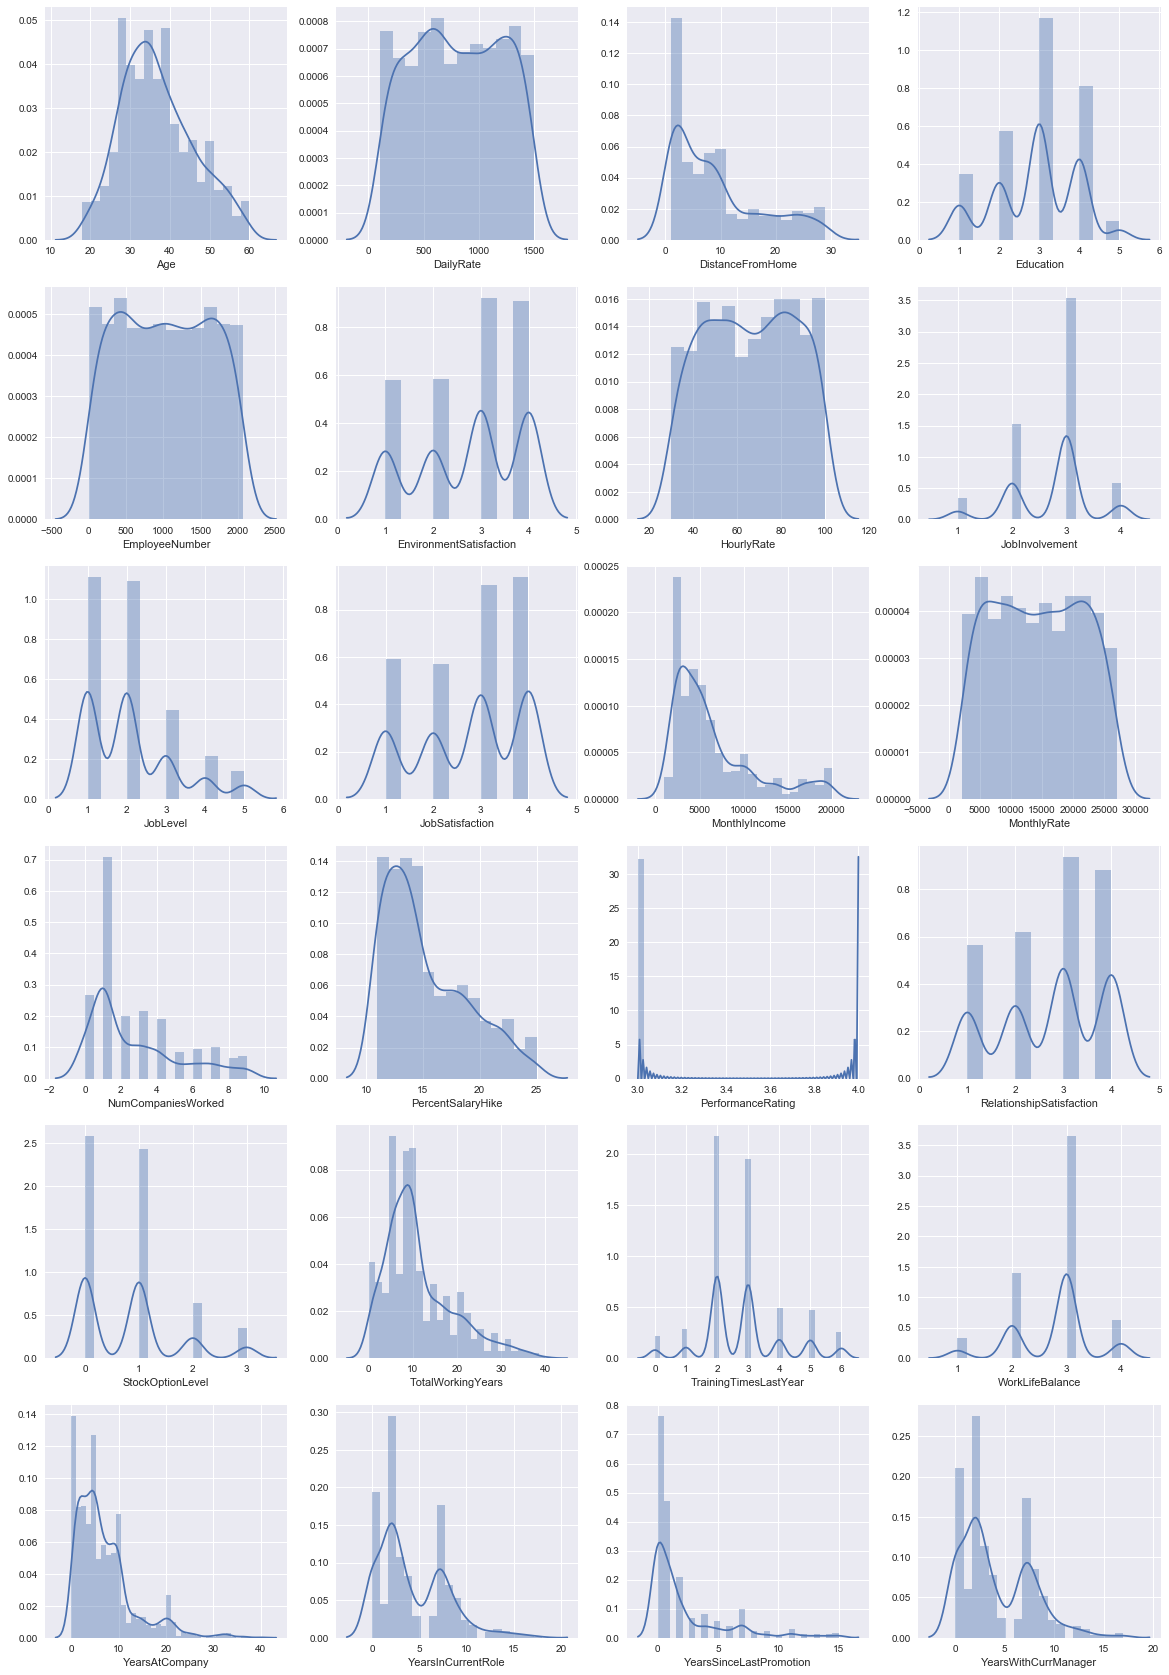

In [130]:
fig, ax = plt.subplots(6,4, figsize = (20, 30))               # 'ax' has references to all the four axes
sns.distplot(df2['Age'], ax = ax[0,0]) 
sns.distplot(df2['DailyRate'], ax = ax[0,1]) 
sns.distplot(df2['DistanceFromHome'], ax = ax[0,2]) 
sns.distplot(df2['Education'], ax = ax[0,3]) 
sns.distplot(df2['EmployeeNumber'], ax = ax[1,0]) 
sns.distplot(df2['EnvironmentSatisfaction'], ax = ax[1,1]) 
sns.distplot(df2['HourlyRate'], ax = ax[1,2]) 
sns.distplot(df2['JobInvolvement'], ax = ax[1,3]) 
sns.distplot(df2['JobLevel'], ax = ax[2,0]) 
sns.distplot(df2['JobSatisfaction'], ax = ax[2,1]) 
sns.distplot(df2['MonthlyIncome'], ax = ax[2,2]) 
sns.distplot(df2['MonthlyRate'], ax = ax[2,3]) 
sns.distplot(df2['NumCompaniesWorked'], ax = ax[3,0]) 
sns.distplot(df2['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df2['PerformanceRating'], ax = ax[3,2]) 
sns.distplot(df2['RelationshipSatisfaction'], ax = ax[3,3]) 
sns.distplot(df2['StockOptionLevel'], ax = ax[4,0]) 
sns.distplot(df2['TotalWorkingYears'], ax = ax[4,1])
sns.distplot(df2['TrainingTimesLastYear'], ax = ax[4,2]) 
sns.distplot(df2['WorkLifeBalance'], ax = ax[4,3]) 
sns.distplot(df2['YearsAtCompany'], ax = ax[5,0]) 
sns.distplot(df2['YearsInCurrentRole'], ax = ax[5,1]) 
sns.distplot(df2['YearsSinceLastPromotion'], ax = ax[5,2]) 
sns.distplot(df2['YearsWithCurrManager'], ax = ax[5,3]) 

plt.show()

Here we see histograms of each numeric variable in the dataset along with blue tick marks ontop of the x axis representing where a single observation (employee) lies. This helps visualize the distributions of the numeric variables. For example, we see Age is almost normally distributed with a slight right tail; whereas the rate features (Daily, Monthly, Hourly) look to be close to uniformly distributed.

It is interesting to note that the Monthly Rate and Monthly Income distributions (and numbers) are very different. I would assume they would beI tried searching for the meaning for these features in other notebooks along with some IBM articles on the dataset, but was unable to get their definitions.

Similar to some of the information provided in the plots above, we can also take note of some common statistics of the numeric features given below:


Employee's age is normally distributed. Majority of them are between 20 and 50 years old and, the average age in the company is around 35. 
Majority of people is earning less than 10000 monthly and monthly salary distibution is sckewed to the right. 
Work experience of the employee is densely populuated until 15 years in the company, later it diminishes rapidly. 

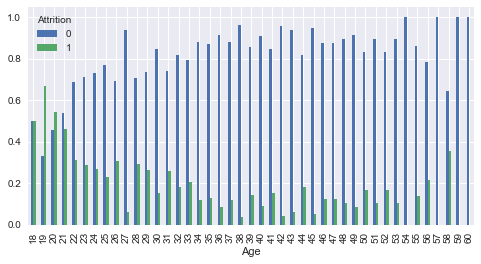

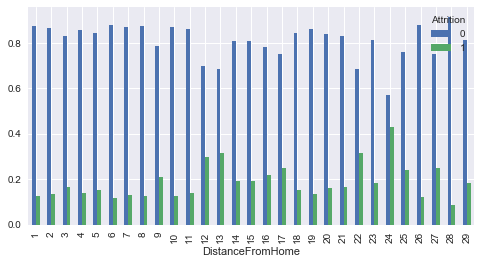

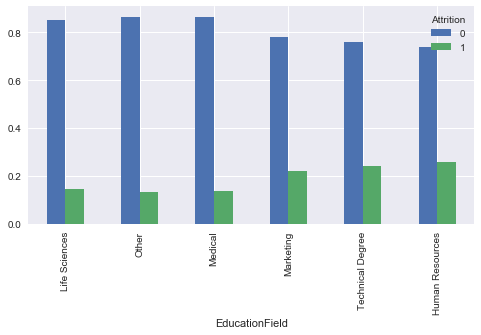

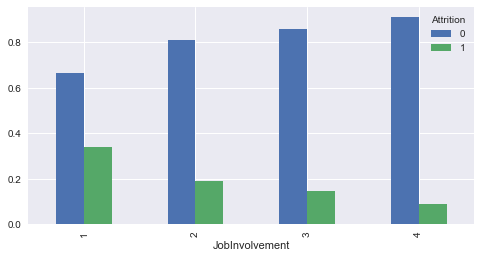

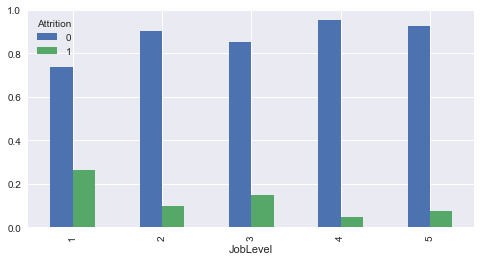

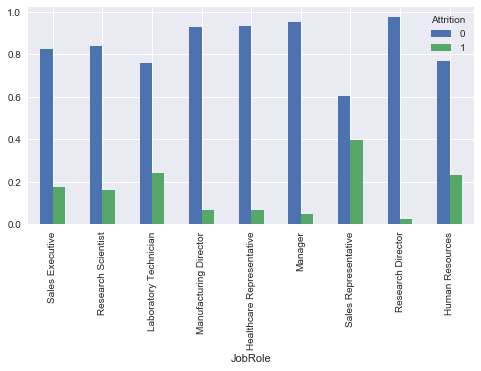

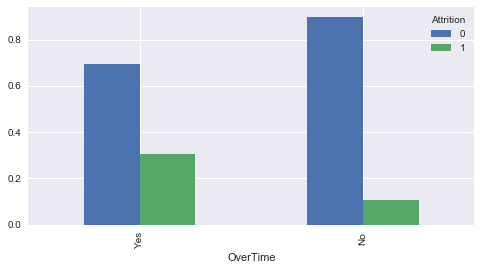

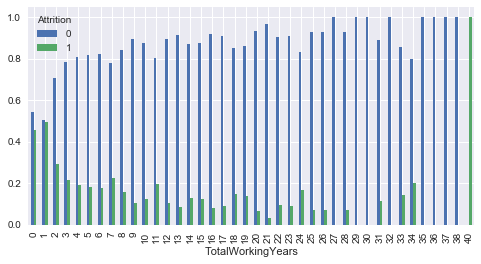

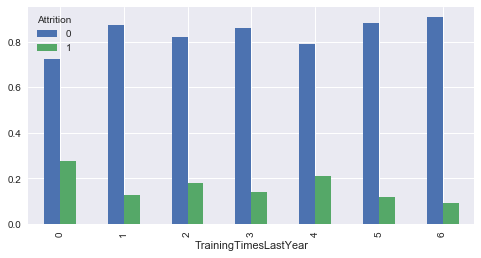

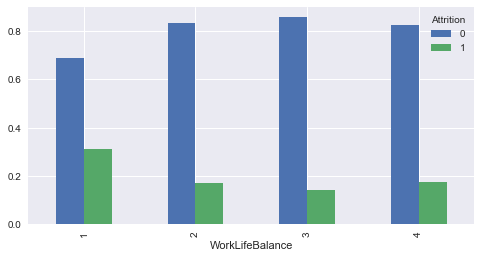

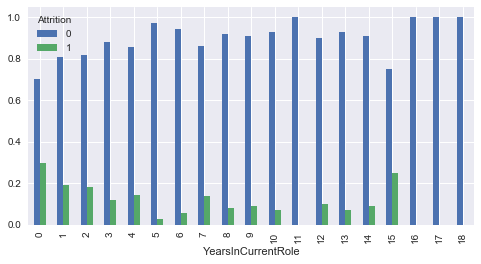

In [131]:
BarPlot_columns=['Age', 'DistanceFromHome', 'EducationField', 'JobInvolvement', 'JobLevel', 'JobRole', 'OverTime',
                'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole'] 

#Method the perform Bar plots
def Bar_plots(var):
    col=pd.crosstab(df2[var], df2['Attrition'])
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)
    
for col in BarPlot_columns:
    Bar_plots(col)

Attrition is very high with employees having age in between 18 to 22. These might be due to students who are doing intership or small contract jobs

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

Attrition is high at age as 28,29 & 30

People with 1 year of experience has quited most

The people stays closer to office and attrition percentage is low in comparision

There are more employees with a bachelors degree followed by masters degree.The attrition levels are not stated across education levels

Stock option as 0 has more attrition in comparision to others stock options

### Feature/Variable Relationships:

Here we will take a look at how variables related to each other. There are various methods/visualizations for this.

#### Correlation Matrix

One method to see how features are related to each other is a correlation matrix given below:

Note: We convert Attrition to 1 for Yes and 0 for no to be able to see if any variables/features are correlated with the target variable.

Two variables are said to be highly correlation when they have a value of 0.7 or greater. The correlation plot between all continuous variables indicate that years at company and year with current manager, years in current role and years with current manager, monthly income and total working years, age and total working years, percent salary hike and performance rating are highly correlated.

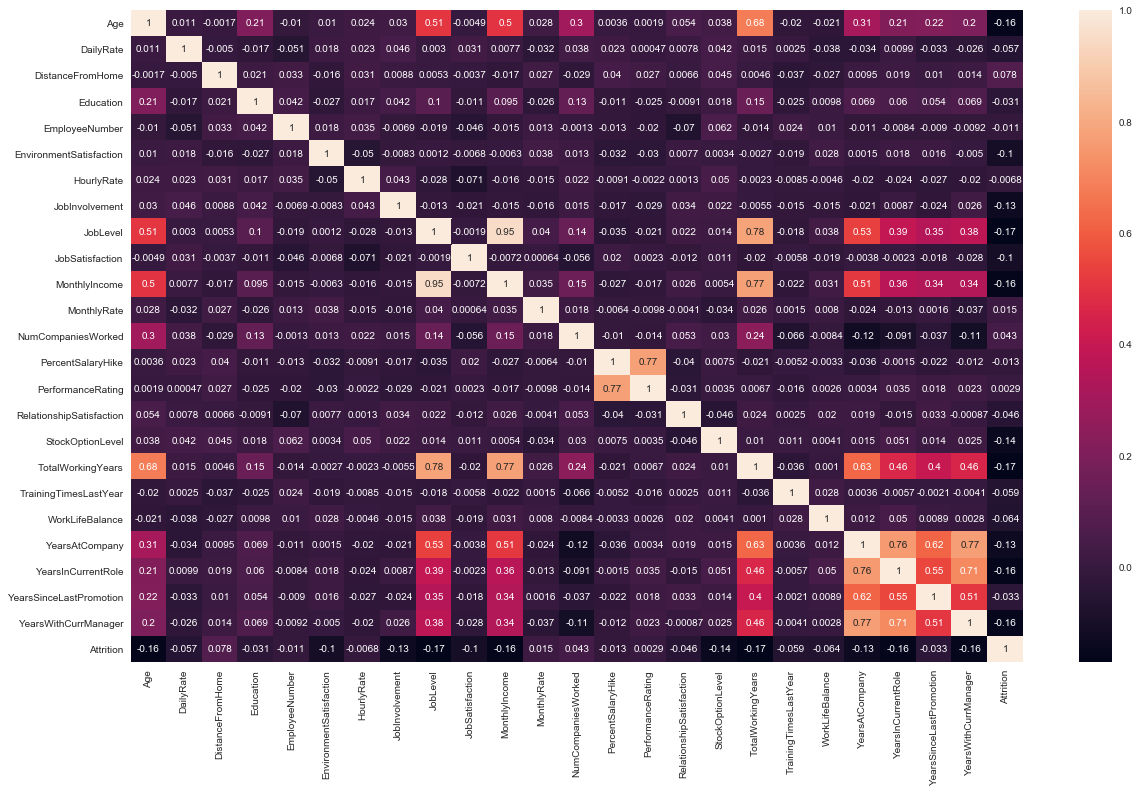

In [100]:
corr_matrix = df2.corr()
f , ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_matrix, vmax=1, annot=True)

Here we see most attributes are not well correlated with each other (i.e. values close to zero); however, there are a few 'hot' or 'dark' spots in the plot.

For one, the top right 'hot' area with the yellow/brown colors correspond to the 'year' variables being somewhat correlated with one another. This makes sense. For example, if one has more years with the company, one can reaonsably expect more years in the current role.

The other interesting hot spot is between Job Level and Monthly Income at just above 0.95! The two rows and two columns corresponding to these features have similar colors. This shows that these two features/variable provide similar information.

Another interesting thing to note is the lack of correlation between HourlyRate, DailyRate, and MonthlyRate. One would think these variables should correlate well with one another; however, the data seems to indicate otherwise.


? Monthly income,Job level is highly correlated with TotalWorkingYears¶
PerformanceRating is highly correlated with PercentSalaryhike

Perhaps unsurprisingly TotalWorkingYears is highly correlated to Job Level (i.e., the longer you work the higher job level you achieve)
HourlyRate, DailyRate, and MonthlyRate are completely uncorrelated with each other which makes no sense. As MonthlyIncome is highly correlated to Job Level i'm inclined to keep using that over any of these.
Age is correlated JobLevel and Education (i.e., the older you are the more educated and successful you are)
Work life Balance correlates to pretty much none of the numeric values
Number of companies you've worked at is weakly correlated with the time you've spent at the company (might indicate you're likely the leave)
If your performance rating is high you'll get a bigger raise!

The employee whose Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCopany and YearsCurrentRole are low tend to cause Attrition.
Young and low income employee
As "OverTime_Yes" is positive correlation, busy employees tend to cause Attrition.
Long-time employee has high JobLevel and MonthlyIncome.¶
On the other hand, "PerformanceRating" is not related with JobLevel and MonthlyIncome.
Althrough employees would be evaluated by contents of work, MonthlyIncome is correlated with working years.
So young employees at this company tend to cause Attrition.

Generally, for the training model, we don't select features that have a strong correlation because it will have multicollinearity problem. Heatmap is a good way to detect this kind of situation. In this case, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearWithCurrManager have strong correlations with each other.

### Scatter Plot

Before we do anything, we can first make an assumption of which features matter most. Maybe Age, TotalWorkingYears or YearsAtCompany? There are other interesting features as well like EmployeeNumber and YearsSinceLastPromotion. For numerical features, we can use scatter plot plus​ regression model to see the trend. Seanborn is a so powerful package that it can do most of the things for us very easily.

<Figure size 432x288 with 0 Axes>

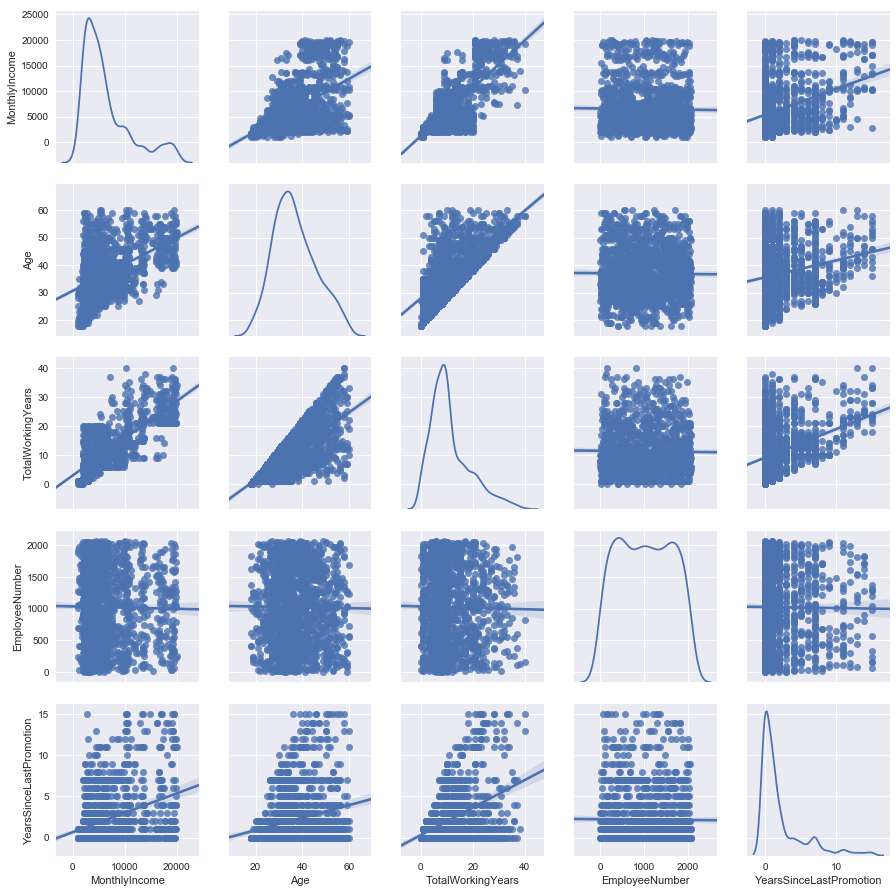

In [140]:
plt.figure()
cols = ["MonthlyIncome","Age","TotalWorkingYears","EmployeeNumber","YearsSinceLastPromotion"]
sns.pairplot(df2[cols],diag_kind="kde",kind="reg")

MonthlyIncome has strong positive correlations with Age and TotalWorkingYears and a slight positive correlation with YearsLastPromotion. It looks like EmployNumber cannot say a lot. Of course, it's not enough. Let's explore more!

### Box Plot

Similarly, we can make an assumption again. We don't need to show all of them right now but some that I think maybe matter a lot, such as Education, JobLevel, JobSatisfaction. I also would like to check other interesting features like Gender and MaritalStatus. I will use boxplot to show the trend.

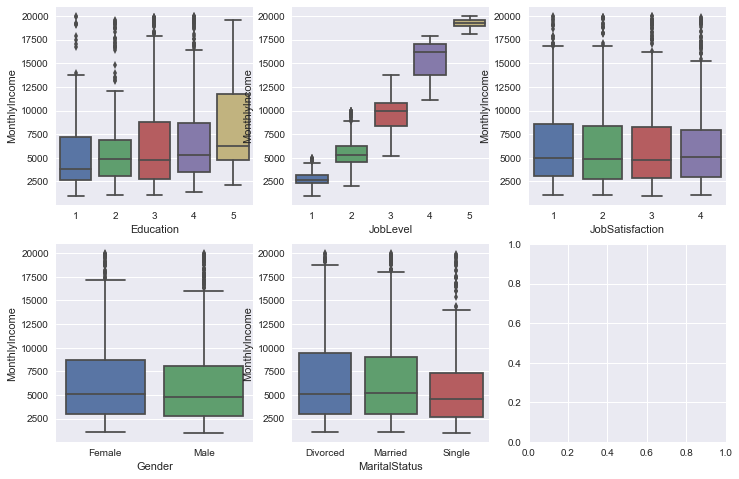

In [142]:
f,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(12,8))
sns.boxplot(x=df2['Education'],y=df['MonthlyIncome'],ax=ax1)
sns.boxplot(x=df2['JobLevel'],y=df['MonthlyIncome'],ax=ax2)
sns.boxplot(x=df2['JobSatisfaction'],y=df['MonthlyIncome'],ax=ax3)
sns.boxplot(x=df2['Gender'],y=df['MonthlyIncome'],ax=ax4)
sns.boxplot(x=df2['MaritalStatus'],y=df['MonthlyIncome'],ax=ax5)

I find something really suprising. First of all, JobLevel has an extremely effect on the income, apparently higher job level means higher income.

### Look for job satisfaction at various job levels

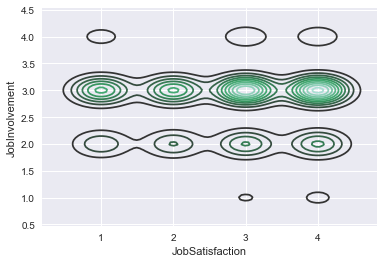

In [101]:
sns.kdeplot(df2['JobSatisfaction'], df2['JobInvolvement'])

- Job involvement is mostly high with high job satisfaction

### Look for satisfaction with environment with education levels of the employee

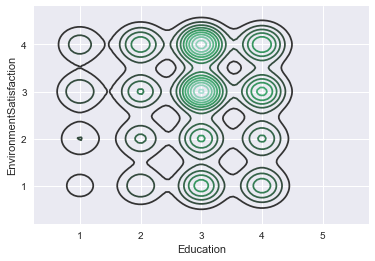

In [102]:
sns.kdeplot(df2['Education'], df2['EnvironmentSatisfaction'])

- Employees with Bachelor and Master degree are mostly likely statisfied with the work environment

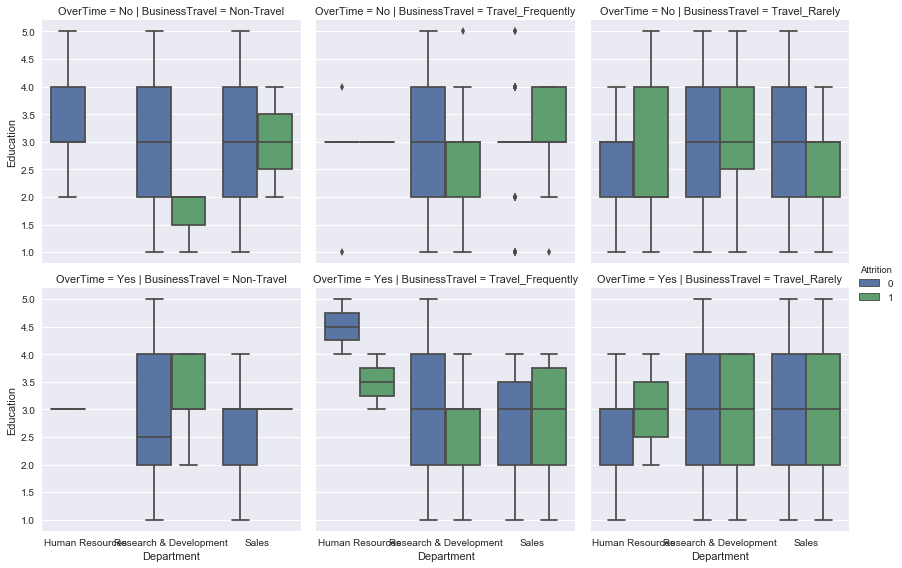

In [105]:
# Factor plot
sns.factorplot(x = 'Department', y = 'Education', hue = 'Attrition',
               col= 'BusinessTravel', row= 'OverTime', kind = 'box', data = df2)           

- People working in Sales department is most likely quit the company when he/she has to travel frequently

- HR people who has to travel rarely is mostly likely to quit irrespective of overtime work

- R&D people who are frequent or rare travellers is mostly likely to quit

- Mostly employee has Bachelor & Master degrees in all departments and this is not contributing factor to any attrition¶

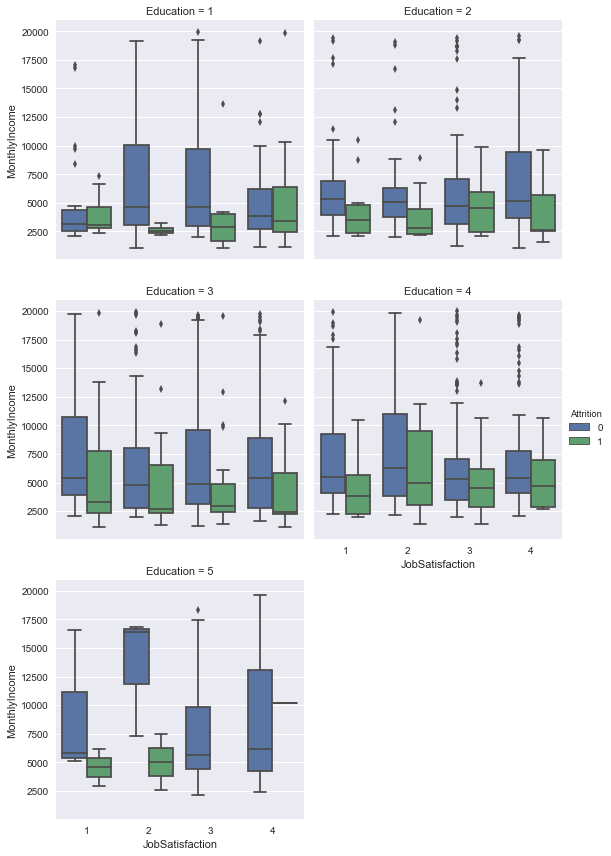

In [106]:
sns.factorplot(x = 'JobSatisfaction',
               y = 'MonthlyIncome',
               hue = 'Attrition',
               col= 'Education',   
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = df2)

- People with less Monthly income are highly attrited irrespetive of Education level & job satisfaction

- People with Below Collage degree has least Monthly income among all categories

- People with Bachelor and Master degree are attrited more than other categories in terms of average income, more people quited when job satisfaction level is low.

In [111]:
#Method that plot density plots on the columns passed as input
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(df2.loc[(df2['Attrition'] == 0), var], color='b', shade=True, label='no Attrition') 
    ax=sns.kdeplot(df2.loc[(df2['Attrition'] == 1), var], color='r', shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

### Box Plot

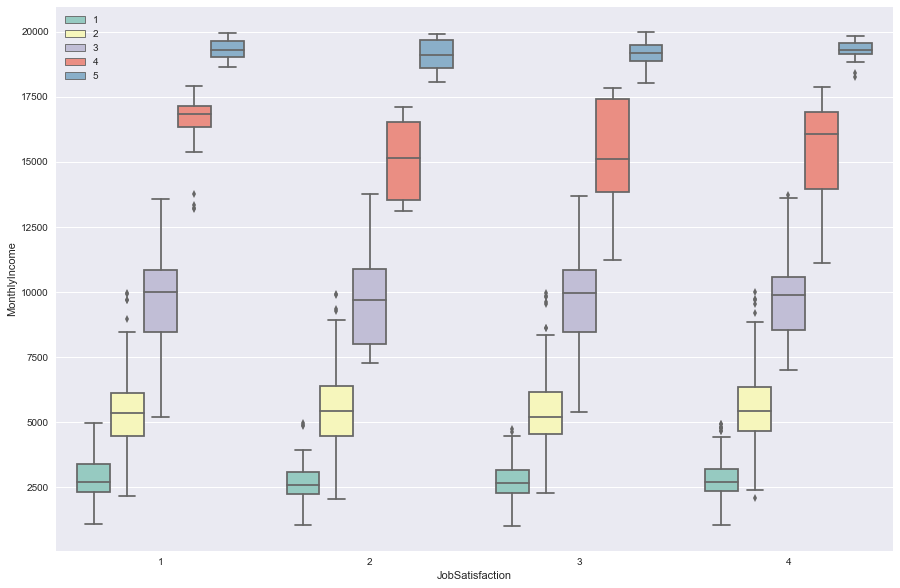

In [72]:
f, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=df2, hue='JobLevel', palette='Set3')
plt.legend(loc='best')
plt.show()

This figure presents the difference in monthly income across different job levels. The difference in monthly income is observed by the median value of for different job satisfaction. 

### Violin Plot

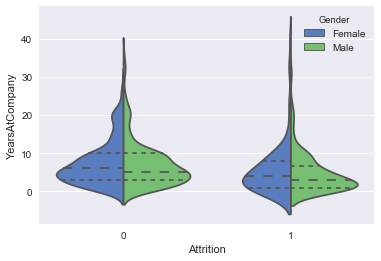

In [132]:
sns.violinplot(x='Attrition', y='YearsAtCompany', hue='Gender', data=df2, palette='muted', split=True, inner='quartile')
plt.show()

Violin plots are similar to box plots but they have the capability to explain the data better. The distribution of data is measured by the width of the violin plot. Here, I have plotted the number of years spent in an organization based on gender. The middle dashed line shows the median. The lines above and below the median show the interquartile range. The denser part shows the maximum population falls under that range and thinner part shows the lesser population.

# Swarm Plot

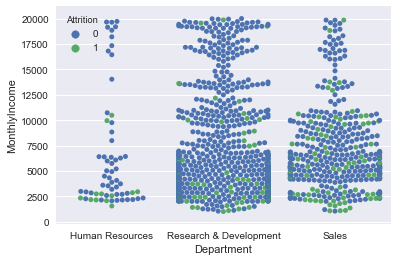

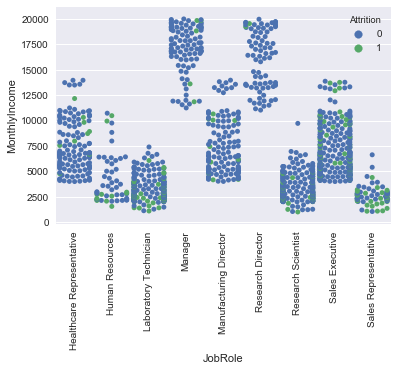

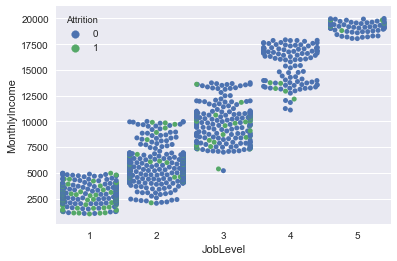

In [133]:
sns.swarmplot(x="Department", y="MonthlyIncome", hue="Attrition", data=df2);
plt.show()

sns.swarmplot(x="JobRole", y="MonthlyIncome", hue="Attrition", data=df2);
plt.xticks( rotation=90 )
plt.show()


sns.swarmplot(x="JobLevel", y="MonthlyIncome", hue="Attrition", data=df2);
plt.show()

? Attrition rate is high in JobLevel 1 at low level salary(Between -10% and +10 % of 2500) after that in JobLevel-2 and LobLvel-3 at salary range between 7500 to 10000).
Attrition rate is high in Sales and Research & Development Departments. especially in JobLevel-1 both the departments.
Conclusion : High Attrition rates are in Sales Representive(JobLevel- 1 & Who are single ), Laboratory Technician (JobLevel - 1 ) , Sales Executive (JobLevel-3 ,JobLevel 2 and who has salary range of 7500 and 10000)

### Join Plot (Scatter Plot)

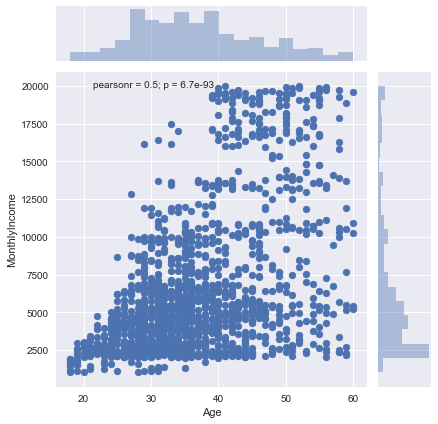

In [134]:
sns.jointplot(df2['Age'], df2['MonthlyIncome'], kind= 'scatter')
plt.show()

Scatter plot shows the relationship between 'Age' and 'Monthly Income'. As it may be seen here, there is a linear relationship. Further, the density plot above shows the distribution of age while density plot in the right shows the distribution of the monthly income. 

### Factor Plot and Facet Grid

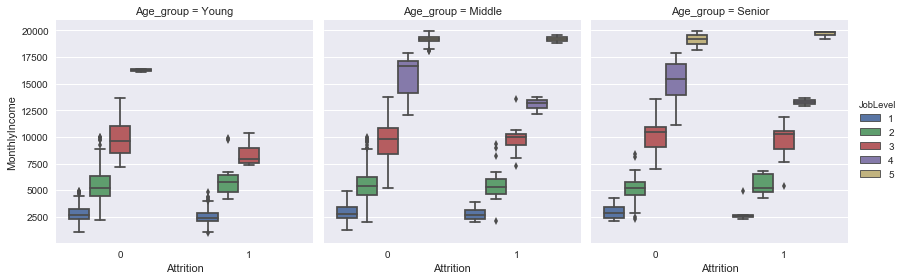

In [135]:
df2['Age_group'] = pd.cut(df['Age'], 3, labels = ['Young', 'Middle', 'Senior'])
sns.factorplot(x = 'Attrition', y = 'MonthlyIncome', hue = 'JobLevel', col='Age_group', col_wrap =3, kind = 'box', data=df2)
plt.show()

Above factor plot shows that monthly income plays an important role in retaining the employees in an organization. It can be observed across job levels and different age groups.

In [ ]:
g = sns.FacetGrid(df2, col='JobSatisfaction', row='Gender')
g.map(sns.kdeplot, 'MonthlyIncome', 'YearsInCurrentRole')
plt.show()

I have created kernel density estimation plot. It displays the density distribution of two continuous variables (namely, monthly income and years in current role). I have created facets according to different job satisfaction levels and gender.

### Pair Plot

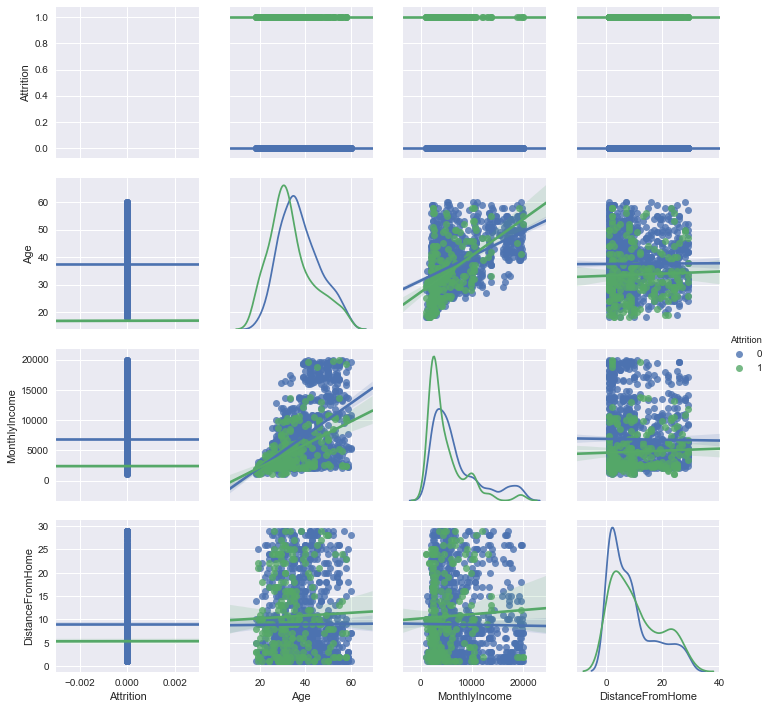

In [115]:
data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(df2[data1], kind="reg", diag_kind = "kde", hue = 'Attrition')
plt.show()

Pairwise plots between continuous variables show the relationship between them. For example, observing the relationship between Age and Monthly Income, we can find that with age, monthly income has increased but the increase is not similar for both groups (Attrition and Retention).

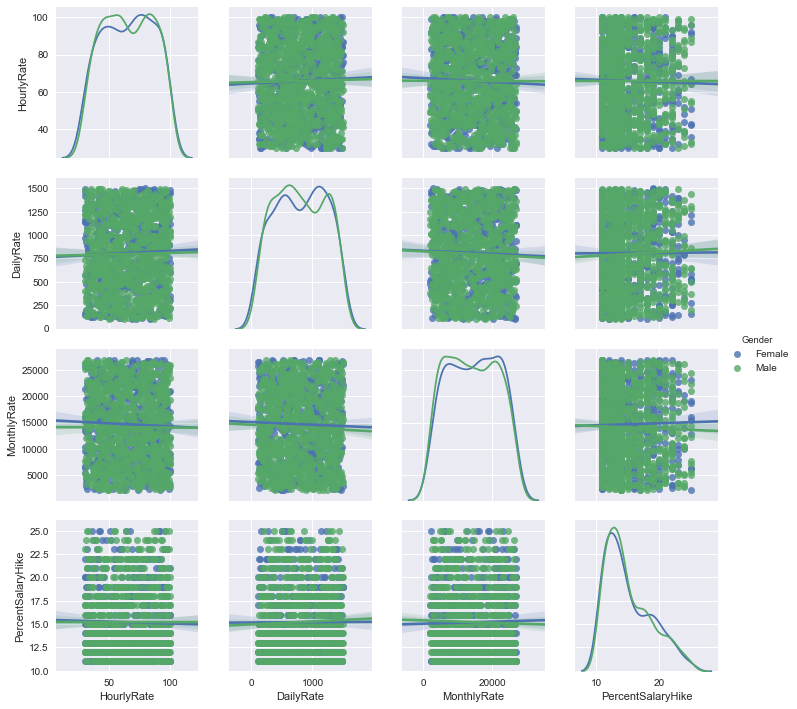

In [116]:
data2 = ['Gender', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
sns.pairplot(df2[data2], kind="reg", diag_kind = "kde" , hue = 'Gender' )
plt.show()

The above plot does not convey much of any relationship between variables across gender. This shows that hourly rate, daily rate, monthly rate and percent salary hike is same for both female and male employees.

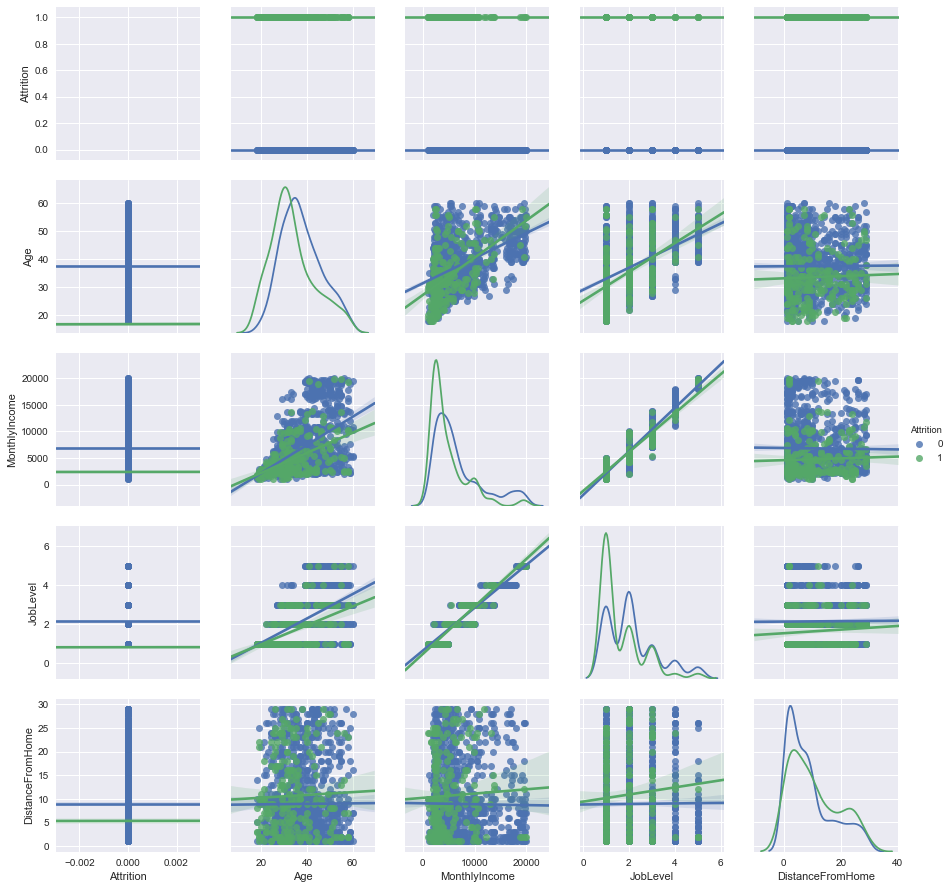

In [117]:
data3 = ['Attrition','Age','MonthlyIncome', 'JobLevel','DistanceFromHome']
sns.pairplot(df2[data3],  kind="reg", diag_kind = "kde", hue = 'Attrition' )
plt.show()

## 

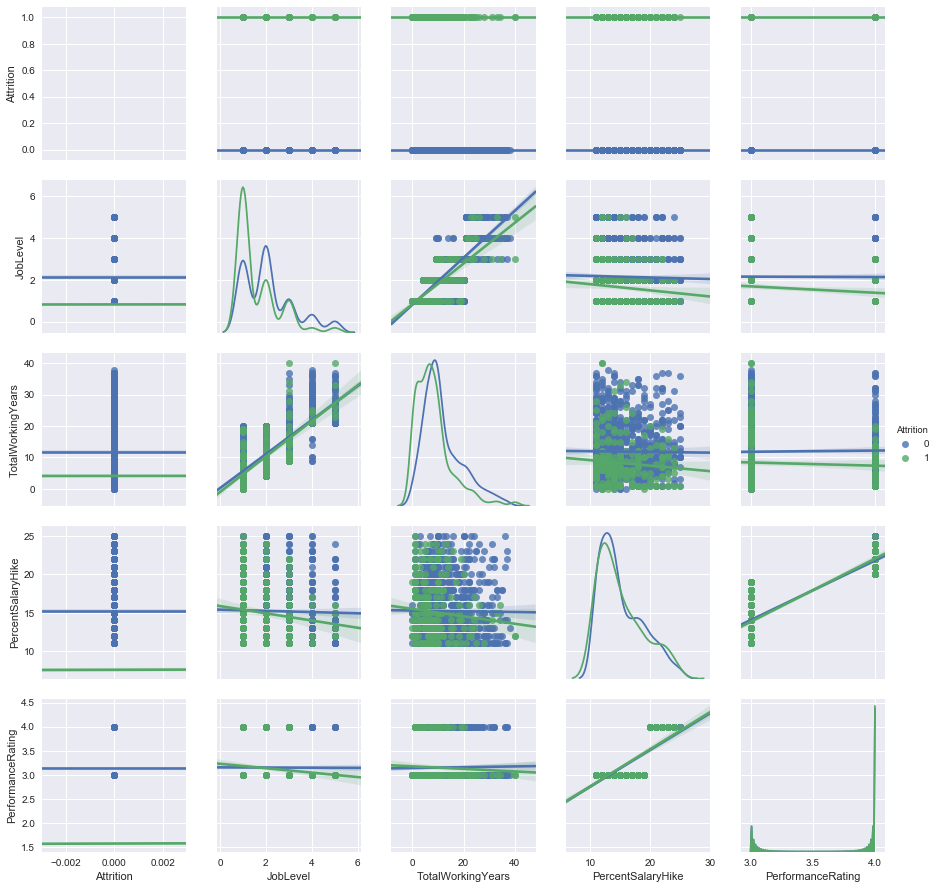

In [138]:
data4= ['Attrition','JobLevel','TotalWorkingYears', 'PercentSalaryHike','PerformanceRating']
sns.pairplot(df2[data4], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()